# Capstone Project - The Battle of Neighborhoods (Week 2)

# IBM Applied Data Science Capstone - Final Report

## 1. Introduction Section

### Business Problem:

My client has been renting an apartment at west San Jose (zip code is 95129) area more than ten years. The leasing rate of a two beds room apartment has been raising dramatically since the crashing of economic bubble in 2008. He pays around 4,500 for his small town house now rather than 2,200 per month ten years ago. My client is pushing me lately to do a search for buying a house at Silicon Valley if the environment is good and the price is within his budget. I am very excited and want to use this opportunity to practice what I've learned so far from this course. My client's key question is : How can I help him to find a convenient and enjoyable place similar to his current resident area? I am planning to use the **FourSquare API** that we learned at this course and some real estate API (such as **ZillowAPI**) and **Silicon Valley Real Estate websites** in the market. The idea is to use this chance to apply the knowledge and tools I have learned so far. Here belows are the requirements from my client:

- The amenities in the selected neighborhood shall be similar to client's current residence apartment
- The price is under 1.5M 
- House must be at least 3 bedrooms, 2 bathrooms, 1 car garage, around 1800 to 2100 square footage of size
- Near the park (within 0.5 mile)
- Near the library (within 1 mile)
- Near the school (within 0.5 mile)
- The schools in the area should have high rating (Ranking greater and equal than 8)
- Not too close to the railroad (at least 3 mile away)
- The location is near the supermarket (within 0.5 mile radius)
- The location is near the shopping mall (within 3 mile radius)
- The location is close (within 1 mile) to venues such as restaurants (Asian and Mexican foods ...etc.), parks and coffee shops
- The neighborhood/community should be safe and have low crime rate

Base on the requirements listed above, I finalize the business problem as:

**How to buy a dream house in Silicon Valley which complies with the requirements of price, features, safety, location and venues?**



### The audience who would be interested in this project:
This case is also applicable for anyone interested in exploring the ways of searching and analysis the location and real estate data for finding a suitable house to buy in Silicon Valley.

## 2. Data Section

#### The following data is required to answer the questions of the business problem:
- List of **public schools** in Santa Clara county with their location data [https://data.sccgov.org/Education/SchoolsPublic/q83h-ht3q]
- List of **parks** in Santa Clara county with their location data [https://data.sccgov.org/Environment/ParkPoints/3t3k-gian]
- List of **railroad station** in Santa Clara county with their location data [https://data.sccgov.org/Transportation/RailroadStations/9wv8-3ekq]
- List of **public library** in Santa Clara county with their location data [https://data.sccgov.org/Government/Libraries/xxrb-pj5j]
- List of **crime report** in Santa Clara county with their location data [https://data.sccgov.org/Public-Safety/Crime-Reports/n9u6-aijz/data]
- California Santa Clara county **school rating** data [https://school-ratings.com/counties/Santa_Clara.html]
- **House price trend** data of the cities in Silicon Valley [https://julianalee.com/trends.htm]
- List of **Recent Sold House** dataset based on zip code [https://julianalee.com/zip-code/95124/95124-home-sales.htm]
- Data from **Zillow API** for comparable house sales analysis [https://github.com/asclepiusaka/zillowAPI]
- Most current list of **houses for sale** in each neighborhoods from real estate website with their addresses, price and selling information [https://julianalee.com/real-estate/property-organizer-view-saved-search/10279348/]
- Data from **Foursquare API** [https://developer.foursquare.com/docs]

#### The dataset and features will be used as following:
1. Use **geopy Nominatim** to find out the latitude and longitude of current resident apartment.
2. Apply **FourSquare** to find 10 venues around current residence in San Jose.
3. Map current residence place with 10 venues.
4. **Schools Dataset**: [features to be extracted: **'ZIP', 'CITY', 'PLACENAME', 'ADDRESS', 'LATITUDE', 'LONGITUDE'**]. **School Rating Dataset** (WebScraping by **BeautifulSoup**): [features to be extracted: **'SCHOOL', 'RANK'**]. Based on my client's house buying criteria, the school ranking (Ranking greater and equal than 8) is a major factor of his consideration. Therefore, I download the public school information dataset from the Santa Clara county open dataset. The goal is to show those schools with their school ranking on the map to help house selection.
5. **Parks dataset**: [features to be extracted: **'PLACENAME', 'LATITUDE', 'LONGITUDE'**]. My client is considering the potential residence community should be close (within 0.5 mile) to parks. So, I download the parks dataset from Santa Clara county's open data repository. The parks will be shown on the map to help house buying decision.
6. **Railroad stations dataset**: [features to be extracted: **'PLACENAME', 'PLACETYPE', 'LATITUDE', 'LONGITUDE'**]. My client raises a concern about the noise of the trains. So, the potential candidates should not be too close (at least 3 mile away) to the railroad stations. The railroad station will be shown on the map to help my client to make buying decision.
7. **Public Libraries dataset**: [features to be extracted: **'ZIP', 'CITY', 'PLACENAME', 'ADDRESS', 'LATITUDE', 'LONGITUDE'**]. My client enjoy going to libraries. The candidates must be convenient to access to the libraries (within 1 mile). The libraries will be shown on the map to help decision making.
8. **Crime Reports dataset**: [features to be extracted: **'city', 'incident_type_primary', 'parent_incident_type', 'latitude', 'longitude'**]. The safety is the most important factor while considering buying a house. My client emphasize that he won't buy a house in an area with higher crime rate even the price is cheaper. The county provides a huge dataset that contains more the one hundred and fifty thousand records. We have to clean up all those data and only keep those which are essential and suitable for visualization.
9. **House price trends data**: WebScraping by **BeautifulSoup** [features to be extracted: **'City', 'Median Price', '2018 Change', '2017 Change', '2016 Change'**]. My client is aiming at an affordable price within 1.5M so a median prices chart including every city/zipcode can provide my client a better direction of home hunting.
10. Process the ZIP code and Cities: Since we can not obtain the exact boundaries of the city, I will utilize the schools dataset which contains all the location data for each school. Usually, higher school density can represent the city when using Foursquare library.
11. Explore Cities in Santa Clara County: [features to be extracted: **'Neighborhood', 'Venue Category', 'venue', 'freq'**]. I will use **Foursquare** to explore all cities/zipcodes. The goal is to find a city that has similar context with my client's current city. The context includes foods, restaurant, coffee shops, gymnastics, interesting points ...etc. I would like to provide a visualization map including similar cities/zipcodes grouped together to my client.
12. Analyze Each Neighborhood/city: Group rows by neighborhood and by taking the mean value of the frequency of occurrence of each category. I will consider each neighborhood along with the top 5 most common venues.
13. Clustering Cities/Zipcodes: Use **KMean or DBScan algorithm** for clustering analysis
14. **Recent Sold House Price Data**: WebScraping by **BeautifulSoup** [features to be extracted: **'ZIP', 'ADDRESS', 'ORGLD', 'ORIG LSPRC', 'LIST PRICE', 'SALE PRICE', 'SQFT', 'LOTSZ', 'COE', 'DOM'**]. I will use geopy Nominatim library to get the latitude and longitude values. The goal is to show those houses with features and sold price on the map to help decision making.
15. House **Comparable Sales Analysis**: [features to be extracted: **'zpid', 'zipcode', 'city', 'street', 'year_built', 'lot_size', 'finished_size', 'bedrooms', 'bathrooms', 'zestimate', 'last_sold_price', 'last_sold_date', 'latitude', 'longitude', 'home_details', 'similar_sales'**]. Use **Zillow API** to get house features from Zillow real estate database

#### The processing of these DATA will allow to answer following key questions to make the buying decision:

- Which city/zipcode is good to consider while considering the **price** (less than 1.5M)?
- Which city/zipcode is good to consider while considering the **school** (within 0.5 mile and ranking >= 8)?
- Which city/zipcode is good to consider while considering the **park** (within 0.5 mile)?
- Which city/zipcode is good to consider while considering the **library** (within 1 mile)?
- Which city/zipcode is good to consider while considering the **railroad** (at least 3 mile away)?
- Which city/zipcode is good to consider while considering the **supermarket** (0.5 mile radius)?
- Which city/zipcode is good to consider while considering the **shopping mall** (within 3 mile radius)?
- Which city/zipcode is good to consider while considering the **foods, restaurants (Asian and Mexican foods ...etc) and coffee shops**?
- Which city/zipcode is good to consider while considering the **safety** (low crime rate)?
- Which city/zipcode has the **best housing pricing**?
- Are there **tradeoffs** between size, price, location and safety?
- What are the venues of the **two best house** to buy?
- Any other **interesting statistical data** findings from the **Foursquare** and **ZillowAPI** real estate data?

## 3.	Methodology Section

In [1]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

#!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.style.use('ggplot') # optional: for ggplot-like style
%matplotlib inline 

# import k-means from clustering stage
from sklearn.cluster import KMeans, DBSCAN

#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library
from folium import plugins

# import scraping library
from bs4 import BeautifulSoup

import requests # library to handle requests

import os

print('Libraries imported.')

Libraries imported.


### 3.1 San Jose Map - Current residence and venues in San Jose
The geopy Nominatim geocoders is used to locate the location data of current rental apartment

In [2]:
# 1101 Weyburn Ln, San Jose, CA 95129
address = '1101 Weyburn Ln, San Jose, CA 95129'
geolocator = Nominatim()
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude

/Users/henryhong/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: DeprecationWarning: Using Nominatim with the default "geopy/1.20.0" `user_agent` is strongly discouraged, as it violates Nominatim's ToS https://operations.osmfoundation.org/policies/nominatim/ and may possibly cause 403 and 429 HTTP errors. Please specify a custom `user_agent` with `Nominatim(user_agent="my-application")` or by overriding the default `user_agent`: `geopy.geocoders.options.default_user_agent = "my-application"`. In geopy 2.0 this will become an exception.
  This is separate from the ipykernel package so we can avoid doing imports until


In [3]:
current_APT_latitude = latitude
current_APT_longitude = longitude

### 3.2 Apply FourSquare to find venues around current residence in San Jose

In [4]:
credential = json.loads(open('Foursquare_Credential.json').read())

In [5]:
CLIENT_ID = credential['client_id']
CLIENT_SECRET = credential['client_secret']
VERSION = '20180605' # Foursquare API version

In [6]:
LIMIT = 100 # limit of number of venues returned by Foursquare API
radius = 500 # define radius
# create URL
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    current_APT_latitude, 
    current_APT_longitude, 
    radius, 
    LIMIT)

In [10]:
results = requests.get(url).json()

In [11]:
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [12]:
venues = results['response']['groups'][0]['items']
nearby_venues_SJ = json_normalize(venues) # flatten JSON
# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues_SJ =nearby_venues_SJ.loc[:, filtered_columns]
# filter the category for each row
nearby_venues_SJ['venue.categories'] = nearby_venues_SJ.apply(get_category_type, axis=1)
# clean columns
nearby_venues_SJ.columns = [col.split(".")[-1] for col in nearby_venues_SJ.columns]
nearby_venues_SJ.shape

(49, 4)

In [13]:
nearby_venues_SJ.head()

name        categories        lat         lng
0        85C Bakery Cafe            Bakery  37.304041 -122.032565
1       Go Fish Poke Bar  Sushi Restaurant  37.304019 -122.032889
2  Music Tunnel KTV Cafe       Karaoke Bar  37.305849 -122.032095
3             Happy Feet    Massage Studio  37.308560 -122.032756
4         Hmart (H Mart)       Supermarket  37.304296 -122.033366

### 3.3 Map current residence place with venues

In [14]:
map_SJ = folium.Map(location=[nearby_venues_SJ['lat'].mean(), nearby_venues_SJ['lng'].mean()], zoom_start=17)
# add markers to map
for lat, lng, label in zip(nearby_venues_SJ['lat'], nearby_venues_SJ['lng'], nearby_venues_SJ['name']):
    label = folium.Popup(label, parse_html=True)
    folium.RegularPolygonMarker(
        [lat, lng],
        number_of_sides=30,
        radius=7,
        popup=label,
        color='blue',
        fill_color='#0f0f0f',
        fill_opacity=0.6,
    ).add_to(map_SJ)  
    
map_SJ

### 3.4 Import Schools Datasets
Based on my client's house buying criteria, the school ranking (Ranking greater and equal than 8) is a major factor of his consideration. Therefore, I download the public school information dataset from the Santa Clara county open dataset. The goal is to show those schools with their school ranking on the map to help house selection.

#### BeautifulSoup - Set up URL to webscrape school ranking data 

In [15]:
def isLineEmpty(line):
    return len(line.strip()) == 0

In [16]:
def contains_word(s, w):
    return (' ' + w + ' ') in (' ' + s + ' ')

In [17]:
def write_new_line(line, current_indent, desired_indent):
	new_line = ""
	spaces_to_add = (current_indent * desired_indent) - current_indent
	if spaces_to_add > 0:
		for i in range(spaces_to_add):
			new_line += " "		
	new_line += str(line) + "\n"
	return new_line

In [18]:
def soup_prettify2(soup, desired_indent): #where desired_indent is number of spaces as an int() 
	pretty_soup = str()
	previous_indent = 0
	for line in soup.prettify().split("\n"): # iterate over each line of a prettified soup
		current_indent = str(line).find("<") # returns the index for the opening html tag '<' 
		# which is also represents the number of spaces in the lines indentation
		if current_indent == -1 or current_indent > previous_indent + 2:
			current_indent = previous_indent + 1
			# str.find() will equal -1 when no '<' is found. This means the line is some kind 
			# of text or script instead of an HTML element and should be treated as a child 
			# of the previous line. also, current_indent should never be more than previous + 1.	
		previous_indent = current_indent
		pretty_soup += write_new_line(line, current_indent, desired_indent)
	return pretty_soup

In [19]:
url = 'https://school-ratings.com/counties/Santa_Clara.html'
source = requests.get(url).text
soup = BeautifulSoup(source, 'lxml')

In [20]:
table = soup.find('table', class_="schoolsTable")

In [21]:
print(soup_prettify2(table, desired_indent=4))

<table cellpadding="10" class="schoolsTable">
    <tr valign="top">
        <td>
            <ul>
                <li>
                    <a class="county" href="index.html">
                        All Counties
                    </a>
                    <ul>
                        <li>
                            <span class="county">
                                Santa Clara County
                            </span>
                        </li>
                        <ul>
                            <li>
                                Alviso (City)
                            </li>
                            <ul>
                                <li>
                                    Santa Clara Unified (District)
                                </li>
                                <ul>
                                    <li id="0">
                                        <a href="../school_details/43696746048870.html">
                                            George

In [22]:
rows = table.tr.li.find_all("li")

In [23]:
html_data = []
for row in rows:
    info = row.text
    html_data.append(info)

In [24]:
str_pattern = ' CSR rank: '
rank = []
for string in html_data:
    if (str_pattern in string):
        rank.append(string.replace(str_pattern, ':'))

In [25]:
ranks = [string.split(':') for string in rank]

#### Import SchoolsPublic_data.csv

In [26]:
df = pd.read_csv('data/SchoolsPublic_data.csv')

In [27]:
df_schools = df[['ZIP', 'CITY', 'PLACENAME', 'ADDRESS', 'LATITUDE', 'LONGITUDE']]

In [28]:
rank = []
length = len(ranks) - 1
for school in df_schools['PLACENAME']:
    i = 0
    for string in ranks:
        if contains_word(string[0], school):
            rank.append(string[1].replace(' ', ''))
            break
        if i < length:
            i = i + 1
        else:
            rank.append(None)
            break

In [29]:
df_schools['RANK'] = rank

/Users/henryhong/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [30]:
df_schools_drop = df_schools.replace(to_replace='None', value=np.nan).dropna()

In [31]:
df_schools_drop = df_schools_drop.replace(to_replace='none', value=np.nan).dropna()

In [32]:
df_schools_sorted = df_schools_drop.sort_values('ZIP').reset_index(drop=True)

In [33]:
df_schools_sorted.shape

(343, 7)

In [34]:
df_schools_sorted.head()

ZIP             CITY                  PLACENAME                  ADDRESS  \
0  94022  Los Altos Hills  Gardner Bullis Elementary       25890 Fremont Road   
1  94022        Los Altos             Los Altos High        201 Almond Avenue   
2  94022        Los Altos  Ardis G. Egan Junior High  100 West Portola Avenue   
3  94022        Los Altos          Almond Elementary        550 Almond Avenue   
4  94022        Los Altos             Bullis Charter  102 West Portola Avenue   

    LATITUDE   LONGITUDE RANK  
0  37.380923 -122.130325   10  
1  37.386302 -122.108160   10  
2  37.395753 -122.116471   10  
3  37.384330 -122.101297   10  
4  37.395753 -122.116471   10

#### Map the public schools in Santa Clara county

In [35]:
county_latitude = df_schools_sorted['LATITUDE'].mean()
county_longitude = df_schools_sorted['LONGITUDE'].mean()

In [36]:
map_school = folium.Map(location=[county_latitude, county_longitude], zoom_start=12)
# add markers to map
for lat, lng, school, rank in zip(df_schools_sorted['LATITUDE'], df_schools_sorted['LONGITUDE'], df_schools_sorted['PLACENAME'], df_schools_sorted['RANK']):
    label = '{} : {}'.format(school, rank)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_school)  
    
map_school

### 3.5 Import Parks dataset
My client is considering the potential residence community should be close (within 0.5 mile) to parks. So, I download the parks dataset from Santa Clara county's open data repository. The parks will be shown on the map to help house buying decision.

In [37]:
df = pd.read_csv('data/ParkPoints_data.csv')

In [38]:
df.head(3)

the_geom  OBJECTID  \
0  POINT (-121.828002162912 37.345196851585)        78   
1  POINT (-121.873064022903 37.420063317865)       249   
2   POINT (-122.104863393974 37.45368249451)        68   

                PLACENAME PLACETYPE  ADDRESS  CITY  ZIP SOURCE    UNIQUEID  \
0            Cassell Park      Park      NaN   NaN  NaN   ESRI   832010POS   
1            Sinnott Park      Park      NaN   NaN  NaN   ESRI  2542010POS   
2  Byxbee Recreation Area      Park      NaN   NaN  NaN   ESRI   732010POS   

  SYMBOLOGYQUERY   LATITUDE   LONGITUDE                    LASTUPDATE  \
0         <Null>  37.345192 -121.827989  09/14/2011 12:00:00 AM +0000   
1         <Null>  37.420058 -121.873051  09/14/2011 12:00:00 AM +0000   
2         <Null>  37.453678 -122.104850  09/14/2011 12:00:00 AM +0000   

      EDITOR           NOTES POICatagory  
0  ISD - GIS  Not Determined     Leisure  
1  ISD - GIS  Not Determined     Leisure  
2  ISD - GIS  Not Determined     Leisure

In [39]:
df_parks = df[['PLACENAME', 'LATITUDE', 'LONGITUDE']]

In [40]:
df_parks.head(3)

PLACENAME   LATITUDE   LONGITUDE
0            Cassell Park  37.345192 -121.827989
1            Sinnott Park  37.420058 -121.873051
2  Byxbee Recreation Area  37.453678 -122.104850

In [41]:
map_park = folium.Map(location=[df_parks['LATITUDE'].mean(), df_parks['LONGITUDE'].mean()], zoom_start=12)
# add markers to map
for lat, lng, label in zip(df_parks['LATITUDE'], df_parks['LONGITUDE'], df_parks['PLACENAME']):
    label = folium.Popup(label, parse_html=True)
    folium.RegularPolygonMarker(
        [lat, lng],
        number_of_sides=30,
        radius=7,
        popup=label,
        color='green',
        fill_color='#0f0f0f',
        fill_opacity=0.6,
    ).add_to(map_park)  
    
map_park

### 3.6 Import Railroad Stations dataset
My client raises a concern about the noise of the trains. So, the potential candidates should not be too close (at least 3 mile away) to the railroad stations. The railroad station will be shown on the map to help my client to make buying decision.

In [42]:
df = pd.read_csv('data/RailroadStations_data.csv')

In [43]:
df.head(2)

the_geom  OBJECTID  \
0  POINT (-122.075692381584 37.394238165016)         5   
1  POINT (-122.142605867004 37.429015624824)         3   

                PLACENAME         PLACETYPE  ADDRESS            CITY  ZIP  \
0   Mountain View Station  Railroad Station      NaN   Mountain View  NaN   
1  California Ave Station  Railroad Station      NaN  California Ave  NaN   

  SOURCE  UNIQUEID SYMBOLOGYQUERY   LATITUDE   LONGITUDE  \
0    VTA  52012RRS         <Null>  37.394233 -122.075679   
1    VTA  32012RRS         <Null>  37.429011 -122.142593   

                     LASTUPDATE     EDITOR  \
0  01/15/2012 12:00:00 AM +0000  ISD - GIS   
1  01/15/2012 12:00:00 AM +0000  ISD - GIS   

                                               NOTES     POICatagory  
0  Class:  MAJOR   Caltrain:  YES   ACE:  NO   Am...  Transportation  
1  Class:  MINOR   Caltrain:  YES   ACE:  NO   Am...  Transportation

In [44]:
df_stations = df[['PLACENAME', 'PLACETYPE', 'LATITUDE', 'LONGITUDE']]

In [45]:
df_stations.head(3)

PLACENAME         PLACETYPE   LATITUDE   LONGITUDE
0     Mountain View Station  Railroad Station  37.394233 -122.075679
1    California Ave Station  Railroad Station  37.429011 -122.142593
2  San Jose Diridon Station  Railroad Station  37.329921 -121.902476

In [46]:
map_station = folium.Map(location=[df_stations['LATITUDE'].mean(), df_stations['LONGITUDE'].mean()], zoom_start=11)
# add markers to map
for lat, lng, label in zip(df_stations['LATITUDE'], df_stations['LONGITUDE'], df_stations['PLACENAME']):
    label = folium.Popup(label, parse_html=True)
    folium.RegularPolygonMarker(
        [lat, lng],
        number_of_sides=30,
        radius=7,
        popup=label,
        color='red',
        fill_color='#0f0f0f',
        fill_opacity=0.6,
    ).add_to(map_station)  
    
map_station

### 3.7 Import Public Libraries dataset
My client enjoy going to libraries. The candidates must be convenient to access to the libraries (within 1 mile). The libraries will be shown on the map to help decision making.

In [47]:
df = pd.read_csv('data/Libraries_data.csv')

In [48]:
df.head(3)

the_geom  OBJECTID  \
0  POINT (-121.885969142705 37.335812735905)        30   
1  POINT (-121.570291046016 37.010614021857)         3   
2  POINT (-121.840748472711 37.311895367172)        34   

                        PLACENAME PLACETYPE                  ADDRESS  \
0                    King Library   Library  150 E. San Fernando St.   
1                  Gilroy Library   Library     7652 Monterey Street   
2  Tully Community Branch Library   Library            880 Tully Rd.   

       CITY    ZIP SOURCE   UNIQUEID SYMBOLOGYQUERY   LATITUDE   LONGITUDE  \
0  San Jose  95112    Web  302012LIB   Scale1 2 3 4  37.335808 -121.885956   
1    Gilroy  95020    Web   32012LIB            NaN  37.010609 -121.570278   
2  San Jose  95111    Web  342012LIB            NaN  37.311890 -121.840735   

                     LASTUPDATE     EDITOR                           NOTES  \
0  08/08/2012 12:00:00 AM +0000  ISD - GIS                             NaN   
1  08/08/2012 12:00:00 AM +0000  ISD - GIS  Gilroy Library (Temp location)   
2  08/08/2012 12:00:00 AM +0000  ISD - GIS                             NaN   

  POICatagory  
0      Public  
1      Public  
2      Public

In [49]:
df_libraries = df[['ZIP', 'CITY', 'PLACENAME', 'ADDRESS', 'LATITUDE', 'LONGITUDE']]

In [50]:
df_libraries.head(3)

ZIP      CITY                       PLACENAME                  ADDRESS  \
0  95112  San Jose                    King Library  150 E. San Fernando St.   
1  95020    Gilroy                  Gilroy Library     7652 Monterey Street   
2  95111  San Jose  Tully Community Branch Library            880 Tully Rd.   

    LATITUDE   LONGITUDE  
0  37.335808 -121.885956  
1  37.010609 -121.570278  
2  37.311890 -121.840735

In [51]:
map_library = folium.Map(location=[df_libraries['LATITUDE'].mean(), df_libraries['LONGITUDE'].mean()], zoom_start=11)
# add markers to map
for lat, lng, label in zip(df_libraries['LATITUDE'], df_libraries['LONGITUDE'], df_libraries['PLACENAME']):
    label = folium.Popup(label, parse_html=True)
    folium.RegularPolygonMarker(
        [lat, lng],
        number_of_sides=30,
        radius=7,
        popup=label,
        color='blue',
        fill_color='#0f0f0f',
        fill_opacity=0.6,
    ).add_to(map_library)  
    
map_library

### 3.8 Import Crime Reports dataset
The safety is the most important factor while considering buying a house. My client emphasize that he won't buy a house in an area with higher crime rate even the price is cheaper. The county provides a huge dataset that contains more the one hundred and fifty thousand records. We have to clean up all those data and only keep those which are essential and suitable for visualization.

In [52]:
df = pd.read_csv('data/Crime_Reports.csv')

In [53]:
df.shape

(162037, 20)

In [54]:
df.head(3)

incident_id case_number       incident_datetime incident_type_primary  \
0    879308729  S182700272  09/27/2018 01:53:41 PM                 Other   
1    879909484  S182760447  10/03/2018 07:58:26 PM      MEET THE CITIZEN   
2    879909480  S182760496  10/03/2018 09:57:59 PM   T/C, MAJOR INJURIES   

                                incident_description  clearance_type  \
0  Call Type: CODE5  <br>Description: <br>Final D...             NaN   
1  Call Type: 1062   <br>Description: MEET THE CI...             NaN   
2  Call Type: 1180   <br>Description: T/C, MAJOR ...             NaN   

              address_1  address_2                city state  zip  country  \
0  6400 Block HESKET CT        NaN  SANTA CLARA COUNTY    CA  NaN      NaN   
1             MC KEE RD        NaN  SANTA CLARA COUNTY    CA  NaN      NaN   
2         LAWRENCE EXPY        NaN  SANTA CLARA COUNTY    CA  NaN      NaN   

    latitude   longitude              created_at              updated_at  \
0  37.227733 -121.808192  09/28/2018 01:29:44 AM  10/04/2018 09:48:15 AM   
1  37.377026 -121.831527  10/04/2018 09:47:13 AM  10/04/2018 09:47:18 AM   
2  37.292336 -121.996517  10/04/2018 09:47:13 AM  10/04/2018 09:47:18 AM   

                                         location  hour_of_day day_of_week  \
0    POINT (-121.80819212320539 37.2277333337941)           13    Thursday   
1  POINT (-121.83152670129735 37.377026179356314)           19   Wednesday   
2   POINT (-121.99651732359759 37.29233587168339)           21   Wednesday   

  parent_incident_type  
0                Other  
1   Community Policing  
2              Traffic

In [55]:
df_crime = df[['city', 'incident_type_primary', 'parent_incident_type', 'latitude', 'longitude']]

In [56]:
df_crime.head(3)

city incident_type_primary parent_incident_type   latitude  \
0  SANTA CLARA COUNTY                 Other                Other  37.227733   
1  SANTA CLARA COUNTY      MEET THE CITIZEN   Community Policing  37.377026   
2  SANTA CLARA COUNTY   T/C, MAJOR INJURIES              Traffic  37.292336   

    longitude  
0 -121.808192  
1 -121.831527  
2 -121.996517

#### Most of the crime records are traffic vialation and pity things that people won't worry too much. So, we reduce the rows down to around three thousand by screening out the records by the keyword "Theft" and "Vehicle"

In [57]:
df_theft_1 = df_crime[df_crime['parent_incident_type'].str.contains("Theft", na = False)]
df_theft = df_theft_1[~df_theft_1['parent_incident_type'].str.contains("Vehicle", na = False)]

In [58]:
df_theft.shape

(3761, 5)

#### The rows can be further reduced by dropping the duplicated rows with the same value in latitude and longitude columns. This means we only plot once in the same spot where may encounter theft many times.

In [59]:
df_theft_removed = df_theft.sort_values('latitude').drop_duplicates(subset=['latitude', 'longitude'], keep='last').reset_index(drop=True)

In [60]:
df_theft_removed.shape

(1368, 5)

#### Thirteen hundred is still too many for a clear visulization. So, we randomly sample five hundred rows for the final displaying.

In [61]:
df_theft_sample = df_theft_removed.sample(n=500).reset_index(drop=True)

In [62]:
df_theft_sample.head(3)

city incident_type_primary parent_incident_type   latitude  \
0  SANTA CLARA COUNTY                 THEFT                Theft  37.408253   
1  SANTA CLARA COUNTY                 THEFT                Theft  37.365256   
2  SANTA CLARA COUNTY                 THEFT                Theft  37.107918   

    longitude  
0 -122.108891  
1 -122.046398  
2 -121.599996

In [63]:
map_theft = folium.Map(location=[df_theft_sample['latitude'].mean(), df_theft_sample['longitude'].mean()], zoom_start=12)
# add markers to map
for lat, lng, label in zip(df_theft_sample['latitude'], df_theft_sample['longitude'], df_theft_sample['parent_incident_type']):
    label = folium.Popup(label, parse_html=True)
    folium.RegularPolygonMarker(
        [lat, lng],
        number_of_sides=30,
        radius=3,
        popup=label,
        color='red',
        fill_color='#0f0f0f',
        fill_opacity=0.6,
    ).add_to(map_theft)  
    
map_theft

### 3.9 Download the house price trends data
My client is aiming at an affordable price within 1.5M so a median prices chart including every city/zipcode can provide my client a better direction of home hunting. The following real estate site provides a very informative data for the house buyers. We can apply the web scraper technique (BeautifulSoup) that we've learned in the course. However, this site won't allow us to do so since that might affect their performance. This prohibition also exists for some popular real estate information websites such as Zillow and Trulia. I've downloaded the dataset about the market trends this month for the Silicon Valley cities. We can base on it and realize the most recent house price and their price changes. My client is aiming an affortable price within 1.5M so the information should be able to give him the idea that which city or zipcode area he should be looking for.

https://julianalee.com/trends.htm

#### Median Prices For Silicon Valley Cities

In [64]:
df_trend = pd.read_csv('data/Market_trends_SV.csv')

In [65]:
df_trend.head(3)

City   Median Price 2018 Change 2017 Change 2016 Change
0  Atherton  US$6,650,000       40.00%     -19.80%       0.40%
1   Belmont  US$1,825,000       10.10%       8.70%       1.00%
2  Brisbane  US$1,200,000       22.40%       5.40%      16.00%

In [66]:
df_trend['Median Price'] = df_trend['Median Price'].replace('[US\$,]', '', regex=True).astype(float)
df_trend['2018 Change'] = df_trend['2018 Change'].replace('[\%]', '', regex=True).astype(float) / 100
df_trend['2017 Change'] = df_trend['2017 Change'].replace('[\%]', '', regex=True).astype(float) / 100
df_trend['2016 Change'] = df_trend['2016 Change'].replace('[\%]', '', regex=True).astype(float) / 100

In [67]:
df_trend.head(3)

City  Median Price  2018 Change  2017 Change  2016 Change
0  Atherton     6650000.0        0.400       -0.198        0.004
1   Belmont     1825000.0        0.101        0.087        0.010
2  Brisbane     1200000.0        0.224        0.054        0.160

In [68]:
df_trend.shape

(36, 5)

In [69]:
# step 1: get the data
df_city_trend = df_trend[['City', 'Median Price']]
df_city_trend = df_city_trend.sort_values('Median Price', ascending=False).reset_index(drop=True)
df_city_trend = df_city_trend.set_index('City')
df_city_trend.head()

Median Price
City                         
Atherton            6650000.0
Los Altos Hills     4850000.0
Hillsborough        4267334.0
Monte Sereno        3500000.0
Woodside            3500000.0

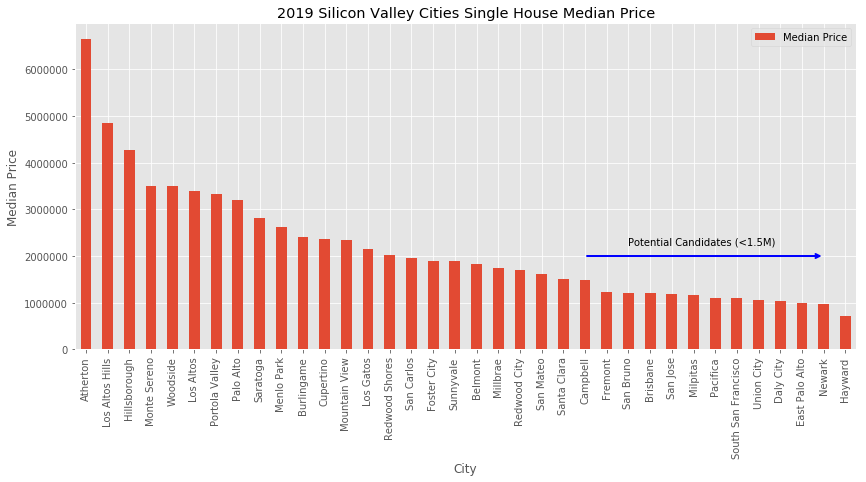

In [70]:
# step 2: plot data
df_city_trend.plot(kind='bar', figsize=(14, 6))

plt.xlabel('City') # add to x-label to the plot
plt.ylabel('Median Price') # add y-label to the plot
plt.title('2019 Silicon Valley Cities Single House Median Price') # add title to the plot

# Annotate arrow
plt.annotate('',                      # s: str. will leave it blank for no text
             xy=(34, 2000000),             # place head of the arrow at point (year 2012 , pop 70)
             xytext=(23, 2000000),         # place base of the arrow at point (year 2008 , pop 20)
             xycoords='data',         # will use the coordinate system of the object being annotated 
             arrowprops=dict(arrowstyle='->', connectionstyle='arc3', color='blue', lw=2)
            )

# Annotate Text
plt.annotate('Potential Candidates (<1.5M)', # text to display
             xy=(25, 2200000),                    # start the text at at point (year 2008 , pop 30)
             rotation=0,                  # based on trial and error to match the arrow
             va='bottom',                    # want the text to be vertically 'bottom' aligned
             ha='left',                      # want the text to be horizontally 'left' algned.
            )

plt.show()

### 3.10 Process the ZIP codes and Cities
Since we can not obtain the exact boundaries of the city, I will utilize the schools dataset which contains all the location data for each school. Usually, higher school density can represent the city when using Foursquare library.

In [71]:
df_schools_sorted.shape

(343, 7)

In [72]:
# Drop those rows with invalid data
drop_list = [2,56,87,89,92,98,182,272,286]
df_zip = df_schools_sorted.drop(df_schools_sorted.index[drop_list]).reset_index(drop=True)

In [73]:
df_zip.shape

(334, 7)

In [74]:
df_zip.head(2)

ZIP             CITY                  PLACENAME             ADDRESS  \
0  94022  Los Altos Hills  Gardner Bullis Elementary  25890 Fremont Road   
1  94022        Los Altos             Los Altos High   201 Almond Avenue   

    LATITUDE   LONGITUDE RANK  
0  37.380923 -122.130325   10  
1  37.386302 -122.108160   10

In [75]:
df_zip_1 = df_zip[['ZIP', 'CITY', 'LATITUDE', 'LONGITUDE']]

In [76]:
df_zip_1.head(3)

ZIP             CITY   LATITUDE   LONGITUDE
0  94022  Los Altos Hills  37.380923 -122.130325
1  94022        Los Altos  37.386302 -122.108160
2  94022        Los Altos  37.384330 -122.101297

#### A city may contain several zip codes but not vice versa. So, we can group the duplicated rows (zip codes) and calculate the mean latitude and longitude values for each new group (unique zip code)

In [77]:
temp = df_zip_1.groupby('ZIP')
temp_city = temp['CITY'].apply(lambda x: set(x).pop())
temp_latitude = temp['LATITUDE'].mean()
temp_longitude = temp['LONGITUDE'].mean()
columns_list = list(zip(temp_city.index, temp_city, temp_latitude, temp_longitude))
df_zip_grouped = pd.DataFrame(columns_list)
df_zip_grouped.columns = ['ZIP', 'CITY', 'LATITUDE', 'LONGITUDE']

In [78]:
df_zip_grouped.head()

ZIP             CITY   LATITUDE   LONGITUDE
0       94022  Los Altos Hills  37.388248 -122.115675
1       94024        Los Altos  37.363458 -122.087928
2  94024-6755        Los Altos  37.342557 -122.082244
3       94040    Mountain View  37.374295 -122.080710
4       94041    Mountain View  37.388177 -122.071375

In [79]:
df_zip_grouped.shape

(53, 4)

In [80]:
county_latitude = df_zip_grouped['LATITUDE'].mean()
county_longitude = df_zip_grouped['LONGITUDE'].mean()

In [81]:
map_city = folium.Map(location=[county_latitude, county_longitude], zoom_start=11)
# add markers to map
for lat, lng, zipcode, city in zip(df_zip_grouped['LATITUDE'], df_zip_grouped['LONGITUDE'], df_zip_grouped['ZIP'], df_zip_grouped['CITY']):
    label = '{} : {}'.format(city, zipcode)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=7,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_city)  
    
map_city

### 3.11 Explore Cities in Santa Clara County
This is the most important part since my client enjoy his current environment and facilities. I will use Foursquare to explore all cities/zipcodes. The goal is to find a city that has similar context with my client's current city. The context includes foods, restaurant, coffee shops, gymnastics, interesting points ...etc. I would like to provide a visualization map including similar cities/zipcodes grouped together to my client.

In [82]:
def getNearbyVenues(names, latitudes, longitudes, radius=1500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
#        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [83]:
SC_county_venues = getNearbyVenues(names = df_zip_grouped['ZIP'],
                                   latitudes = df_zip_grouped['LATITUDE'],
                                   longitudes = df_zip_grouped['LONGITUDE']
                                  )

In [84]:
SC_county_venues.shape

(3497, 7)

In [85]:
SC_county_venues.head()

Neighborhood  Neighborhood Latitude  Neighborhood Longitude  \
0        94022              37.388248             -122.115675   
1        94022              37.388248             -122.115675   
2        94022              37.388248             -122.115675   
3        94022              37.388248             -122.115675   
4        94022              37.388248             -122.115675   

                                   Venue  Venue Latitude  Venue Longitude  \
0                     De Martini Orchard       37.382820      -122.114610   
1                            Linden Tree       37.379216      -122.116963   
2                           Satura Cakes       37.378835      -122.115860   
3  State of Mind Public House & Pizzeria       37.380444      -122.115732   
4                       Tin Pot Creamery       37.378643      -122.118322   

   Venue Category  
0  Farmers Market  
1       Bookstore  
2          Bakery  
3     Pizza Place  
4  Ice Cream Shop

#### Let's check how many venues were returned for each zipcode/city

In [86]:
#SC_county_venues.groupby('Neighborhood').count()

#### Let's find out how many unique categories can be curated from all the returned venues

In [87]:
print('There are {} uniques categories.'.format(len(SC_county_venues['Venue Category'].unique())))

There are 310 uniques categories.


### 3.12 Analyze Each Neighborhood
Group rows by neighborhood and by taking the mean value of the frequency of occurrence of each category. I will consider each neighborhood along with the top 5 most common venues.

In [88]:
# one hot encoding
SC_county_onehot = pd.get_dummies(SC_county_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
SC_county_onehot['Neighborhood'] = SC_county_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [SC_county_onehot.columns[-1]] + list(SC_county_onehot.columns[:-1])
SC_county_onehot = SC_county_onehot[fixed_columns]

SC_county_onehot.head()

Neighborhood  ATM  Acupuncturist  Afghan Restaurant  African Restaurant  \
0        94022    0              0                  0                   0   
1        94022    0              0                  0                   0   
2        94022    0              0                  0                   0   
3        94022    0              0                  0                   0   
4        94022    0              0                  0                   0   

   Airport Terminal  American Restaurant  Antique Shop  Arcade  Art Gallery  \
0                 0                    0             0       0            0   
1                 0                    0             0       0            0   
2                 0                    0             0       0            0   
3                 0                    0             0       0            0   
4                 0                    0             0       0            0   

   Art Museum  Arts & Crafts Store  Asian Restaurant  Athletics & Sports  \
0           0                    0                 0                   0   
1           0                    0                 0                   0   
2           0                    0                 0                   0   
3           0                    0                 0                   0   
4           0                    0                 0                   0   

   Auto Garage  Automotive Shop  BBQ Joint  Bagel Shop  Bakery  Bank  Bar  \
0            0                0          0           0       0     0    0   
1            0                0          0           0       0     0    0   
2            0                0          0           0       1     0    0   
3            0                0          0           0       0     0    0   
4            0                0          0           0       0     0    0   

   Baseball Field  Basketball Court  Beer Bar  Beer Garden  Beer Store  \
0               0                 0         0            0           0   
1               0                 0         0            0           0   
2               0                 0         0            0           0   
3               0                 0         0            0           0   
4               0                 0         0            0           0   

   Big Box Store  Bike Shop  Bike Trail  Bistro  Board Shop  Bookstore  \
0              0          0           0       0           0          0   
1              0          0           0       0           0          1   
2              0          0           0       0           0          0   
3              0          0           0       0           0          0   
4              0          0           0       0           0          0   

   Boutique  Boxing Gym  Brazilian Restaurant  Breakfast Spot  Brewery  \
0         0           0                     0               0        0   
1         0           0                     0               0        0   
2         0           0                     0               0        0   
3         0           0                     0               0        0   
4         0           0                     0               0        0   

   Bridal Shop  Bubble Tea Shop  Buffet  Building  Burger Joint  \
0            0                0       0         0             0   
1            0                0       0         0             0   
2            0                0       0         0             0   
3            0                0       0         0             0   
4            0                0       0         0             0   

   Burmese Restaurant  Burrito Place  Bus Station  Business Service  Butcher  \
0                   0              0            0                 0        0   
1                   0              0            0                 0        0   
2                   0              0            0                 0        0   
3                   0              0            0                 0        0   
4     

In [89]:
SC_county_onehot.shape

(3497, 311)

#### Group rows by neighborhood and by taking the mean of the frequency of occurrence of each category

In [90]:
SC_county_grouped = SC_county_onehot.groupby('Neighborhood').mean().reset_index()
SC_county_grouped.head()

Neighborhood       ATM  Acupuncturist  Afghan Restaurant  \
0        94022  0.010638            0.0                0.0   
1        94024  0.021739            0.0                0.0   
2   94024-6755  0.032258            0.0                0.0   
3        94040  0.013514            0.0                0.0   
4        94041  0.010000            0.0                0.0   

   African Restaurant  Airport Terminal  American Restaurant  Antique Shop  \
0                 0.0               0.0             0.031915           0.0   
1                 0.0               0.0             0.021739           0.0   
2                 0.0               0.0             0.032258           0.0   
3                 0.0               0.0             0.000000           0.0   
4                 0.0               0.0             0.010000           0.0   

     Arcade  Art Gallery  Art Museum  Arts & Crafts Store  Asian Restaurant  \
0  0.010638          0.0         0.0             0.000000              0.00   
1  0.000000          0.0         0.0             0.021739              0.00   
2  0.000000          0.0         0.0             0.032258              0.00   
3  0.000000          0.0         0.0             0.000000              0.00   
4  0.000000          0.0         0.0             0.000000              0.02   

   Athletics & Sports  Auto Garage  Automotive Shop  BBQ Joint  Bagel Shop  \
0                 0.0          0.0             0.00   0.010638    0.010638   
1                 0.0          0.0             0.00   0.000000    0.043478   
2                 0.0          0.0             0.00   0.000000    0.000000   
3                 0.0          0.0             0.00   0.000000    0.027027   
4                 0.0          0.0             0.01   0.010000    0.000000   

     Bakery      Bank  Bar  Baseball Field  Basketball Court  Beer Bar  \
0  0.021277  0.021277  0.0        0.000000          0.000000       0.0   
1  0.000000  0.021739  0.0        0.000000          0.021739       0.0   
2  0.000000  0.032258  0.0        0.032258          0.000000       0.0   
3  0.013514  0.027027  0.0        0.000000          0.000000       0.0   
4  0.030000  0.000000  0.0        0.000000          0.000000       0.0   

   Beer Garden  Beer Store  Big Box Store  Bike Shop  Bike Trail  Bistro  \
0         0.00    0.010638            0.0   0.010638         0.0     0.0   
1         0.00    0.000000            0.0   0.000000         0.0     0.0   
2         0.00    0.000000            0.0   0.000000         0.0     0.0   
3         0.00    0.000000            0.0   0.000000         0.0     0.0   
4         0.01    0.010000            0.0   0.000000         0.0     0.0   

   Board Shop  Bookstore  Boutique  Boxing Gym  Brazilian Restaurant  \
0         0.0   0.010638      0.00         0.0                   0.0   
1         0.0   0.000000      0.00         0.0                   0.0   
2         0.0   0.000000      0.00         0.0                   0.0   
3         0.0   0.000000      0.00         0.0                   0.0   
4         0.0   0.010000      0.01         0.0                   0.0   

   Breakfast Spot  Brewery  Bridal Shop  Bubble Tea Shop  Buffet  Building  \
0        0.053191     0.00          0.0         0.010638     0.0       0.0   
1        0.021739     0.00          0.0         0.021739     0.0       0.0   
2        0.000000     0.00          0.0         0.000000     0.0       0.0   
3        0.000000     0.00          0.0         0.027027     0.0       0.0   
4        0.010000     0.01          0.0         0.030000     0.0       0.0   

   Burger Joint  Burmese Restaurant  Burrito Place  Bus Station  \
0      0.010638                 0.0           0.00     0.000000   
1      0.000000                 0.0           0.00     0.000000   
2      0.000000                 0.0           0.00     0.000000   
3      0.027027                 0.0           0.00     0.013514   
4      0.020000                 0.0           0.01     0.000000   

   Busine

In [91]:
SC_county_grouped.shape

(53, 311)

####  Print each neighborhood along with the top 5 most common venues

In [92]:
num_top_venues = 5

for hood in SC_county_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = SC_county_grouped[SC_county_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----94022----
                venue  freq
0      Breakfast Spot  0.05
1  Italian Restaurant  0.05
2         Coffee Shop  0.04
3         Pizza Place  0.04
4  Mexican Restaurant  0.04


----94024----
           venue  freq
0    Coffee Shop  0.09
1           Café  0.09
2  Grocery Store  0.07
3           Park  0.07
4    Pizza Place  0.04


----94024-6755----
              venue  freq
0              Park  0.13
1       Coffee Shop  0.10
2     Grocery Store  0.06
3          Pharmacy  0.03
4  Business Service  0.03


----94040----
            venue  freq
0     Coffee Shop  0.07
1  Sandwich Place  0.05
2     Pizza Place  0.05
3   Grocery Store  0.05
4     Supermarket  0.04


----94041----
                venue  freq
0         Coffee Shop  0.05
1                Park  0.04
2  Mexican Restaurant  0.04
3   Indian Restaurant  0.03
4     Bubble Tea Shop  0.03


----94043----
                venue  freq
0          Food Truck  0.05
1  Mexican Restaurant  0.05
2                Park  0.05
3    Sushi Rest

In [93]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [94]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = SC_county_grouped['Neighborhood']

for ind in np.arange(SC_county_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(SC_county_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

Neighborhood 1st Most Common Venue 2nd Most Common Venue  \
0        94022    Italian Restaurant        Breakfast Spot   
1        94024           Coffee Shop                  Café   
2   94024-6755                  Park           Coffee Shop   
3        94040           Coffee Shop           Pizza Place   
4        94041           Coffee Shop                  Park   

  3rd Most Common Venue 4th Most Common Venue 5th Most Common Venue  \
0           Coffee Shop    Mexican Restaurant           Pizza Place   
1                  Park         Grocery Store  Gym / Fitness Center   
2         Grocery Store                   ATM    Mexican Restaurant   
3        Sandwich Place         Grocery Store           Supermarket   
4    Mexican Restaurant     Indian Restaurant      Ramen Restaurant   

  6th Most Common Venue 7th Most Common Venue 8th Most Common Venue  \
0                  Park      Sushi Restaurant         Grocery Store   
1            Bagel Shop         Shopping Mall           Gas Station   
2  Gym / Fitness Center             Gift Shop           Gas Station   
3                   Spa  Gym / Fitness Center                 Trail   
4            Playground           Pizza Place                Bakery   

  9th Most Common Venue 10th Most Common Venue  
0   American Restaurant                   Bank  
1           Pizza Place     Salon / Barbershop  
2           Supermarket            Pizza Place  
3                  Park       Sushi Restaurant  
4       Bubble Tea Shop            Yoga Studio

### 3.13 Clustering Cities/Zipcodes
Use KMean algorithm for clustering analysis

In [95]:
# set number of clusters
kclusters = 6

SC_county_grouped_clustering = SC_county_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(SC_county_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([1, 4, 4, 1, 1, 1, 1, 1, 5, 1], dtype=int32)

In [96]:
# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

SC_county_merged = df_zip_grouped

SC_county_merged = SC_county_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='ZIP')


In [97]:
SC_county_merged.head(3)

ZIP             CITY   LATITUDE   LONGITUDE  Cluster Labels  \
0       94022  Los Altos Hills  37.388248 -122.115675               1   
1       94024        Los Altos  37.363458 -122.087928               4   
2  94024-6755        Los Altos  37.342557 -122.082244               4   

  1st Most Common Venue 2nd Most Common Venue 3rd Most Common Venue  \
0    Italian Restaurant        Breakfast Spot           Coffee Shop   
1           Coffee Shop                  Café                  Park   
2                  Park           Coffee Shop         Grocery Store   

  4th Most Common Venue 5th Most Common Venue 6th Most Common Venue  \
0    Mexican Restaurant           Pizza Place                  Park   
1         Grocery Store  Gym / Fitness Center            Bagel Shop   
2                   ATM    Mexican Restaurant  Gym / Fitness Center   

  7th Most Common Venue 8th Most Common Venue 9th Most Common Venue  \
0      Sushi Restaurant         Grocery Store   American Restaurant   
1         Shopping Mall           Gas Station           Pizza Place   
2             Gift Shop           Gas Station           Supermarket   

  10th Most Common Venue  
0                   Bank  
1     Salon / Barbershop  
2            Pizza Place

In [98]:
# create map
map_clusters = folium.Map(location=[county_latitude, county_longitude], zoom_start=11)
cluster_name = ['Cluster-1', 'Cluster-2', 'Cluster-3', 'Cluster-4', 'Cluster-5', 'Cluster-6', 'Cluster-7', 'Cluster-8', 'Cluster-9', 'Cluster-10']
# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, zipcode, city, cluster in zip(SC_county_merged['LATITUDE'], SC_county_merged['LONGITUDE'], SC_county_merged['ZIP'], SC_county_merged['CITY'], SC_county_merged['Cluster Labels']):
    label = folium.Popup(city + ' : ' + zipcode + ' <--> ' + cluster_name[cluster], parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=10,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

### 3.14 Import Recent Sold House Price Data

#### Import sold_95008.txt

In [99]:
sold_95008 = pd.read_csv('data/sold_95008.txt', sep = '\t')

In [100]:
sold_95008.head(3)

ADDRESS   ORGLD ORIG LSPRC LIST PRICE SALE PRICE  SQFT  LOTSZ  \
0      1165 Holmes AVE  Apr-21  1,204,888  1,204,888  1,175,000  1155   8514   
1     1508 Theresa AVE  Jun-18  1,250,000  1,250,000  1,250,000  1504   9912   
2  1050 Springfield DR  May-06  1,575,000  1,350,000  1,330,000  1831   6200   

      COE  DOM    ZIP  
0  Jul-01   41  95008  
1  Jul-03    2  95008  
2  Jul-15   56  95008

In [101]:
sold_95008 = sold_95008[['ZIP', 'ADDRESS', 'ORGLD', 'ORIG LSPRC', 'LIST PRICE', 'SALE PRICE', 'SQFT', 'LOTSZ', 'COE', 'DOM']]

In [102]:
temp_lat = []
temp_lng = []
for zipcode, addr in zip(sold_95008['ZIP'], sold_95008['ADDRESS']):   
    address = addr + ', ' + str(zipcode)
#    print(address)
    geolocator = Nominatim()
    location = geolocator.geocode(address)
    latitude = location.latitude
    longitude = location.longitude
    temp_lat.append(latitude)
    temp_lng.append(longitude)
sold_95008['LATITUDE'] = temp_lat
sold_95008['LONGITUDE'] = temp_lng
# save dataframe to csv file
sold_95008.to_csv('data/sold_95008.csv',index=False)

/Users/henryhong/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: DeprecationWarning: Using Nominatim with the default "geopy/1.20.0" `user_agent` is strongly discouraged, as it violates Nominatim's ToS https://operations.osmfoundation.org/policies/nominatim/ and may possibly cause 403 and 429 HTTP errors. Please specify a custom `user_agent` with `Nominatim(user_agent="my-application")` or by overriding the default `user_agent`: `geopy.geocoders.options.default_user_agent = "my-application"`. In geopy 2.0 this will become an exception.
  


In [103]:
sold_95008.head(3)

ZIP              ADDRESS   ORGLD ORIG LSPRC LIST PRICE SALE PRICE  SQFT  \
0  95008      1165 Holmes AVE  Apr-21  1,204,888  1,204,888  1,175,000  1155   
1  95008     1508 Theresa AVE  Jun-18  1,250,000  1,250,000  1,250,000  1504   
2  95008  1050 Springfield DR  May-06  1,575,000  1,350,000  1,330,000  1831   

   LOTSZ     COE  DOM   LATITUDE   LONGITUDE  
0   8514  Jul-01   41  37.258799 -121.950435  
1   9912  Jul-03    2  37.265229 -121.963372  
2   6200  Jul-15   56  37.291568 -121.968251

#### Import sold_95118.txt

In [104]:
sold_95118 = pd.read_csv('data/sold_95118.txt', sep = '\t')

In [105]:
sold_95118.head(3)

ADDRESS   ORGLD ORIG LSPRC LIST PRICE SALE PRICE  SQFT  LOTSZ  \
0  1269 Karie Ann WAY  Jun-25    949,000    949,000    950,000  1575   6332   
1       5693 TUBAC LN  Apr-10  1,120,000  1,050,000  1,025,000  1176   6098   
2   5254 Dellwood WAY  Jun-05  1,099,000  1,099,000  1,060,000  1544   6699   

      COE  DOM    ZIP  
0  Jul-05    7  95118  
1  Jul-10   68  95118  
2  Jul-10    5  95118

In [106]:
sold_95118 = sold_95118[['ZIP', 'ADDRESS', 'ORGLD', 'ORIG LSPRC', 'LIST PRICE', 'SALE PRICE', 'SQFT', 'LOTSZ', 'COE', 'DOM']]

In [107]:
temp_lat = []
temp_lng = []
for zipcode, addr in zip(sold_95118['ZIP'], sold_95118['ADDRESS']):   
    address = addr + ', ' + str(zipcode)
#    print(address)
    geolocator = Nominatim()
    location = geolocator.geocode(address)
    latitude = location.latitude
    longitude = location.longitude
    temp_lat.append(latitude)
    temp_lng.append(longitude)
sold_95118['LATITUDE'] = temp_lat
sold_95118['LONGITUDE'] = temp_lng
# save dataframe to csv file
sold_95118.to_csv('data/sold_95118.csv',index=False)

/Users/henryhong/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: DeprecationWarning: Using Nominatim with the default "geopy/1.20.0" `user_agent` is strongly discouraged, as it violates Nominatim's ToS https://operations.osmfoundation.org/policies/nominatim/ and may possibly cause 403 and 429 HTTP errors. Please specify a custom `user_agent` with `Nominatim(user_agent="my-application")` or by overriding the default `user_agent`: `geopy.geocoders.options.default_user_agent = "my-application"`. In geopy 2.0 this will become an exception.
  


In [108]:
sold_95118.head(3)

ZIP             ADDRESS   ORGLD ORIG LSPRC LIST PRICE SALE PRICE  SQFT  \
0  95118  1269 Karie Ann WAY  Jun-25    949,000    949,000    950,000  1575   
1  95118       5693 TUBAC LN  Apr-10  1,120,000  1,050,000  1,025,000  1176   
2  95118   5254 Dellwood WAY  Jun-05  1,099,000  1,099,000  1,060,000  1544   

   LOTSZ     COE  DOM   LATITUDE   LONGITUDE  
0   6332  Jul-05    7  37.273045 -121.884222  
1   6098  Jul-10   68  37.241549 -121.886199  
2   6699  Jul-10    5  37.250325 -121.889208

#### Import sold_95124.txt

In [109]:
sold_95124 = pd.read_csv('data/sold_95124.txt', sep = ':')

In [110]:
sold_95124.head(3)

ADDRESS     ORGLD ORIG LSPRC LIST PRICE SALE PRICE  SQFT  LOTSZ  \
0   1906 Bernice WAY    Jul-03    900,000    900,000    940,000  1280   6251   
1  4004 Meridian AVE    Jun-07    999,000    999,000  1,160,000  1359   6010   
2     5162 Leigh AVE    Apr-25  1,268,000  1,183,388  1,172,100  1283   6179   

      COE  DOM    ZIP  
0  Jul-03    0  95124  
1  Jul-16    7  95124  
2  Jul-15   51  95124

In [111]:
sold_95124 = sold_95124[['ZIP', 'ADDRESS', 'ORGLD', 'ORIG LSPRC', 'LIST PRICE', 'SALE PRICE', 'SQFT', 'LOTSZ', 'COE', 'DOM']]

#### Use geopy library to get the latitude and longitude values

In [112]:
temp_lat = []
temp_lng = []
for zipcode, addr in zip(sold_95124['ZIP'], sold_95124['ADDRESS']):   
    address = addr + ', ' + str(zipcode)
#    print(address)
    geolocator = Nominatim()
    location = geolocator.geocode(address)
    latitude = location.latitude
    longitude = location.longitude
    temp_lat.append(latitude)
    temp_lng.append(longitude)
sold_95124['LATITUDE'] = temp_lat
sold_95124['LONGITUDE'] = temp_lng
# save dataframe to csv file
sold_95124.to_csv('data/sold_95124.csv',index=False)

/Users/henryhong/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: DeprecationWarning: Using Nominatim with the default "geopy/1.20.0" `user_agent` is strongly discouraged, as it violates Nominatim's ToS https://operations.osmfoundation.org/policies/nominatim/ and may possibly cause 403 and 429 HTTP errors. Please specify a custom `user_agent` with `Nominatim(user_agent="my-application")` or by overriding the default `user_agent`: `geopy.geocoders.options.default_user_agent = "my-application"`. In geopy 2.0 this will become an exception.
  


In [113]:
sold_95008 = sold_95008.sort_values('SQFT', ascending=False).reset_index(drop=True)
sold_95118 = sold_95118.sort_values('SQFT', ascending=False).reset_index(drop=True)
sold_95124 = sold_95124.sort_values('SQFT', ascending=False).reset_index(drop=True)

In [114]:
sold_95008.shape

(6, 12)

In [115]:
sold_95118.shape

(11, 12)

In [116]:
sold_95124.shape

(16, 12)

In [117]:
sold_95008.head(3)

ZIP              ADDRESS   ORGLD ORIG LSPRC LIST PRICE SALE PRICE  SQFT  \
0  95008     1619 Walters AVE  May-30  2,399,000  2,399,000  2,395,000  3177   
1  95008      1139 Arnott WAY  Apr-22  1,749,000  1,649,000  1,600,000  2112   
2  95008  1050 Springfield DR  May-06  1,575,000  1,350,000  1,330,000  1831   

   LOTSZ     COE  DOM   LATITUDE   LONGITUDE  
0  10872  Jul-10   11  37.267614 -121.978558  
1   7993  Jul-11   49  37.281752 -121.929344  
2   6200  Jul-15   56  37.291568 -121.968251

In [118]:
sold_95118.head(3)

ZIP                ADDRESS   ORGLD ORIG LSPRC LIST PRICE SALE PRICE  \
0  95118       3031 Jenkins AVE  Apr-23  1,488,000  1,438,000  1,365,555   
1  95118       1582 Chambers DR  May-31  1,269,000  1,269,000  1,300,000   
2  95118  1529 Calle De Stuarda  May-28  1,399,000  1,399,000  1,450,000   

   SQFT  LOTSZ     COE  DOM   LATITUDE   LONGITUDE  
0  2079   6555  Jul-09   49  37.274944 -121.889380  
1  1984   6300  Jul-03   11  37.266623 -121.900934  
2  1614   6879  Jul-10    8  37.261006 -121.894809

In [119]:
sold_95124.head(3)

ZIP               ADDRESS   ORGLD ORIG LSPRC LIST PRICE SALE PRICE  SQFT  \
0  95124  1691 Willow Creek DR  Jun-03  1,550,000  1,550,000  1,576,000  2294   
1  95124      1859 Laurinda DR  May-16  1,997,000  1,997,000  1,949,000  2270   
2  95124        2417 Hecate PL  May-07  1,398,888  1,333,888  1,300,000  2064   

   LOTSZ     COE  DOM   LATITUDE   LONGITUDE  
0   9161  Jul-02   10  37.272966 -121.909507  
1   7557  Jul-03   26  37.247126 -121.921016  
2   4621  Jul-16   45  37.255261 -121.948872

In [120]:
comps_95008 = sold_95008
comps_95118 = sold_95118
comps_95124 = sold_95124

### 3.15 Use Zillow API to get some house features from Zillow real estate database

In [121]:
from zillowAPI import zillow
z = zillow()

In [122]:
apikey = json.loads(open('apikey.json').read())['key']

In [123]:
l_zpid = []
l_zipcode = []
l_city = []
l_street = []
l_year_built = []
l_lot_size = []
l_finished_size = []
l_bedrooms = []
l_bathrooms = []
l_zestimate = []
l_last_sold_price = []
l_last_sold_date = []
l_latitude = []
l_longitude = []
l_home_details = []
l_similar_sales = []

for zipcode, address in zip(comps_95008['ZIP'], comps_95008['ADDRESS']):
#    print(zipcode, address)
    result3 = z.GetDeepSearch(apikey, address=address, citystatezip=zipcode, rentzestimate=True)
    zillow_id = result3.results[0].zpid
    l_zpid.append(result3.results[0].zpid)
    l_zipcode.append(result3.results[0].address.zipcode)
    l_city.append(result3.results[0].address.city)
    l_street.append(result3.results[0].address.street)
    l_year_built.append(result3.results[0].year_built)
    l_lot_size.append(result3.results[0].lot_size)
    l_finished_size.append(result3.results[0].finished_size)
    l_bedrooms.append(result3.results[0].bedrooms)
    l_bathrooms.append(result3.results[0].bathrooms)
    l_zestimate.append(result3.results[0].zestimate.zestimate)
    l_last_sold_price.append(result3.results[0].last_sold_price)
    l_last_sold_date.append(result3.results[0].last_sold_date)
    l_latitude.append(result3.results[0].address.latitude)
    l_longitude.append(result3.results[0].address.longitude)
    l_home_details.append(result3.results[0].links.home_details)
    l_similar_sales.append(result3.results[0].links.similar_sales)

df_comps_95008 = pd.DataFrame()
df_comps_95008['zpid'] = l_zpid
df_comps_95008['zipcode'] = l_zipcode
df_comps_95008['city'] = l_city
df_comps_95008['street'] = l_street
df_comps_95008['year_built'] = l_year_built
df_comps_95008['lot_size'] = l_lot_size
df_comps_95008['finished_size'] = l_finished_size
df_comps_95008['bedrooms'] = l_bedrooms
df_comps_95008['bathrooms'] = l_bathrooms
df_comps_95008['zestimate'] = l_zestimate
df_comps_95008['last_sold_price'] = l_last_sold_price
df_comps_95008['last_sold_date'] = l_last_sold_date
df_comps_95008['latitude'] = l_latitude
df_comps_95008['longitude'] = l_longitude
df_comps_95008['home_details'] = l_home_details
df_comps_95008['similar_sales'] = l_similar_sales

In [124]:
l_zpid = []
l_zipcode = []
l_city = []
l_street = []
l_year_built = []
l_lot_size = []
l_finished_size = []
l_bedrooms = []
l_bathrooms = []
l_zestimate = []
l_last_sold_price = []
l_last_sold_date = []
l_latitude = []
l_longitude = []
l_home_details = []
l_similar_sales = []

for zipcode, address in zip(comps_95118['ZIP'], comps_95118['ADDRESS']):
#    print(zipcode, address)
    result3 = z.GetDeepSearch(apikey, address=address, citystatezip=zipcode, rentzestimate=True)
    zillow_id = result3.results[0].zpid
    l_zpid.append(result3.results[0].zpid)
    l_zipcode.append(result3.results[0].address.zipcode)
    l_city.append(result3.results[0].address.city)
    l_street.append(result3.results[0].address.street)
    l_year_built.append(result3.results[0].year_built)
    l_lot_size.append(result3.results[0].lot_size)
    l_finished_size.append(result3.results[0].finished_size)
    l_bedrooms.append(result3.results[0].bedrooms)
    l_bathrooms.append(result3.results[0].bathrooms)
    l_zestimate.append(result3.results[0].zestimate.zestimate)
    l_last_sold_price.append(result3.results[0].last_sold_price)
    l_last_sold_date.append(result3.results[0].last_sold_date)
    l_latitude.append(result3.results[0].address.latitude)
    l_longitude.append(result3.results[0].address.longitude)
    l_home_details.append(result3.results[0].links.home_details)
    l_similar_sales.append(result3.results[0].links.similar_sales)

df_comps_95118 = pd.DataFrame()
df_comps_95118['zpid'] = l_zpid
df_comps_95118['zipcode'] = l_zipcode
df_comps_95118['city'] = l_city
df_comps_95118['street'] = l_street
df_comps_95118['year_built'] = l_year_built
df_comps_95118['lot_size'] = l_lot_size
df_comps_95118['finished_size'] = l_finished_size
df_comps_95118['bedrooms'] = l_bedrooms
df_comps_95118['bathrooms'] = l_bathrooms
df_comps_95118['zestimate'] = l_zestimate
df_comps_95118['last_sold_price'] = l_last_sold_price
df_comps_95118['last_sold_date'] = l_last_sold_date
df_comps_95118['latitude'] = l_latitude
df_comps_95118['longitude'] = l_longitude
df_comps_95118['home_details'] = l_home_details
df_comps_95118['similar_sales'] = l_similar_sales

In [125]:
l_zpid = []
l_zipcode = []
l_city = []
l_street = []
l_year_built = []
l_lot_size = []
l_finished_size = []
l_bedrooms = []
l_bathrooms = []
l_zestimate = []
l_last_sold_price = []
l_last_sold_date = []
l_latitude = []
l_longitude = []
l_home_details = []
l_similar_sales = []

for zipcode, address in zip(comps_95124['ZIP'], comps_95124['ADDRESS']):
#    print(zipcode, address)
    result3 = z.GetDeepSearch(apikey, address=address, citystatezip=zipcode, rentzestimate=True)
    zillow_id = result3.results[0].zpid
    l_zpid.append(result3.results[0].zpid)
    l_zipcode.append(result3.results[0].address.zipcode)
    l_city.append(result3.results[0].address.city)
    l_street.append(result3.results[0].address.street)
    l_year_built.append(result3.results[0].year_built)
    l_lot_size.append(result3.results[0].lot_size)
    l_finished_size.append(result3.results[0].finished_size)
    l_bedrooms.append(result3.results[0].bedrooms)
    l_bathrooms.append(result3.results[0].bathrooms)
    l_zestimate.append(result3.results[0].zestimate.zestimate)
    l_last_sold_price.append(result3.results[0].last_sold_price)
    l_last_sold_date.append(result3.results[0].last_sold_date)
    l_latitude.append(result3.results[0].address.latitude)
    l_longitude.append(result3.results[0].address.longitude)
    l_home_details.append(result3.results[0].links.home_details)
    l_similar_sales.append(result3.results[0].links.similar_sales)

df_comps_95124 = pd.DataFrame()
df_comps_95124['zpid'] = l_zpid
df_comps_95124['zipcode'] = l_zipcode
df_comps_95124['city'] = l_city
df_comps_95124['street'] = l_street
df_comps_95124['year_built'] = l_year_built
df_comps_95124['lot_size'] = l_lot_size
df_comps_95124['finished_size'] = l_finished_size
df_comps_95124['bedrooms'] = l_bedrooms
df_comps_95124['bathrooms'] = l_bathrooms
df_comps_95124['zestimate'] = l_zestimate
df_comps_95124['last_sold_price'] = l_last_sold_price
df_comps_95124['last_sold_date'] = l_last_sold_date
df_comps_95124['latitude'] = l_latitude
df_comps_95124['longitude'] = l_longitude
df_comps_95124['home_details'] = l_home_details
df_comps_95124['similar_sales'] = l_similar_sales

In [126]:
df_comps_95008.shape

(6, 16)

In [127]:
df_comps_95118.shape

(11, 16)

In [128]:
df_comps_95124.shape

(16, 16)

In [129]:
city_latitude = df_comps_95124['latitude'].mean()
city_longitude = df_comps_95124['longitude'].mean()

In [130]:
map_comps = folium.Map(location=[city_latitude, city_longitude], zoom_start=13)

for lat, lng, bd, ba, sqft, price in zip(df_comps_95008['latitude'], df_comps_95008['longitude'], df_comps_95008['bedrooms'], df_comps_95008['bathrooms'], df_comps_95008['finished_size'], df_comps_95008['last_sold_price']):
    label = '{}bd / {}ba / {} ft2 / ${}'.format(bd, ba, sqft, price)
    label = folium.Popup(label, parse_html=True)
    folium.RegularPolygonMarker(
        [lat, lng],
        number_of_sides=3,
        radius=7,
        popup=label,
        color='red',
        fill_color='red',
        fill_opacity=0.7
    ).add_to(map_comps)

for lat, lng, bd, ba, sqft, price in zip(df_comps_95118['latitude'], df_comps_95118['longitude'], df_comps_95118['bedrooms'], df_comps_95118['bathrooms'], df_comps_95118['finished_size'], df_comps_95118['last_sold_price']):
    label = '{}bd / {}ba / {} ft2 / ${}'.format(bd, ba, sqft, price)
    label = folium.Popup(label, parse_html=True)
    folium.RegularPolygonMarker(
        [lat, lng],
        number_of_sides=6,
        radius=7,
        popup=label,
        color='red',
        fill_color='red',
        fill_opacity=0.7
    ).add_to(map_comps)

for lat, lng, bd, ba, sqft, price in zip(df_comps_95124['latitude'], df_comps_95124['longitude'], df_comps_95124['bedrooms'], df_comps_95124['bathrooms'], df_comps_95124['finished_size'], df_comps_95124['last_sold_price']):
    label = '{}bd / {}ba / {} ft2 / ${}'.format(bd, ba, sqft, price)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=7,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_comps)  

map_comps

## 4.	Results Section

### Consolidated Map of Santa Clara county with schools, parks, libraries and cluster of cities
#### 1. School --- Red Circle
#### 2. Park --- Green Hexigon
#### 3. Library --- Blue Square
#### 4. Cluster of city --- Large Circle (same cluster = same color)
#### 5. Comparable Houses in 95124 --- Blue Triangle

In [131]:
map_SC_one = folium.Map(location=[county_latitude, county_longitude], zoom_start=12)

# set color scheme for the clusters
cluster_name = ['Cluster-1', 'Cluster-2', 'Cluster-3', 'Cluster-4', 'Cluster-5', 'Cluster-6', 'Cluster-7', 'Cluster-8', 'Cluster-9', 'Cluster-10']
x = np.arange(kclusters)
ys = [i+x+(i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]
markers_colors = []
for lat, lon, zipcode, city, cluster in zip(SC_county_merged['LATITUDE'], SC_county_merged['LONGITUDE'], SC_county_merged['ZIP'], SC_county_merged['CITY'], SC_county_merged['Cluster Labels']):
    label = folium.Popup(city + ' : ' + zipcode + ' <--> ' + cluster_name[cluster], parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=20,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.3
    ).add_to(map_SC_one)

# add school markers to map
for lat, lng, school, rank in zip(df_schools_sorted['LATITUDE'], df_schools_sorted['LONGITUDE'], df_schools_sorted['PLACENAME'], df_schools_sorted['RANK']):
    label = '{} : {}'.format(school, rank)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='red',
        fill=False,
        fill_color='#3186cc',
        fill_opacity=0.5,
        parse_html=False
    ).add_to(map_SC_one)  

# add markers of parks to map
for lat, lng, label in zip(df_parks['LATITUDE'], df_parks['LONGITUDE'], df_parks['PLACENAME']):
    label = folium.Popup(label, parse_html=True)
    folium.RegularPolygonMarker(
        [lat, lng],
        number_of_sides=6,
        radius=7,
        popup=label,
        color='green',
        fill_color='#0f0f0f',
        fill_opacity=0.5
    ).add_to(map_SC_one)

# add markers of libraries to map
for lat, lng, label in zip(df_libraries['LATITUDE'], df_libraries['LONGITUDE'], df_libraries['PLACENAME']):
    label = folium.Popup(label, parse_html=True)
    folium.RegularPolygonMarker(
        [lat, lng],
        number_of_sides=4,
        radius=7,
        popup=label,
        color='blue',
        fill_color='#0f0f0f',
        fill_opacity=0.6
    ).add_to(map_SC_one)

# add markers of 95124 comparable houses to map
for lat, lng, bd, ba, sqft, price in zip(df_comps_95124['latitude'], df_comps_95124['longitude'], df_comps_95124['bedrooms'], df_comps_95124['bathrooms'], df_comps_95124['finished_size'], df_comps_95124['last_sold_price']):
    label = '{}bd / {}ba / {} ft2 / ${}'.format(bd, ba, sqft, price)
    label = folium.Popup(label, parse_html=True)
    folium.RegularPolygonMarker(
        [lat, lng],
        number_of_sides=3,
        radius=8,
        popup=label,
        color='blue',
        fill_color='blue',
        fill_opacity=0.9
    ).add_to(map_SC_one)

# add markers of 95118 comparable houses to map
for lat, lng, bd, ba, sqft, price in zip(df_comps_95118['latitude'], df_comps_95118['longitude'], df_comps_95118['bedrooms'], df_comps_95118['bathrooms'], df_comps_95118['finished_size'], df_comps_95118['last_sold_price']):
    label = '{}bd / {}ba / {} ft2 / ${}'.format(bd, ba, sqft, price)
    label = folium.Popup(label, parse_html=True)
    folium.RegularPolygonMarker(
        [lat, lng],
        number_of_sides=3,
        radius=8,
        popup=label,
        color='red',
        fill_color='red',
        fill_opacity=0.9
    ).add_to(map_SC_one)

# add markers of 95008 comparable houses to map
for lat, lng, bd, ba, sqft, price in zip(df_comps_95008['latitude'], df_comps_95008['longitude'], df_comps_95008['bedrooms'], df_comps_95008['bathrooms'], df_comps_95008['finished_size'], df_comps_95008['last_sold_price']):
    label = '{}bd / {}ba / {} ft2 / ${}'.format(bd, ba, sqft, price)
    label = folium.Popup(label, parse_html=True)
    folium.RegularPolygonMarker(
        [lat, lng],
        number_of_sides=3,
        radius=8,
        popup=label,
        color='green',
        fill_color='green',
        fill_opacity=0.9
    ).add_to(map_SC_one)

# Adds tool to the top right
from folium.plugins import MeasureControl
map_SC_one.add_child(MeasureControl())

# Measurement ruler icon tool to measure distances in map
from folium.plugins import FloatImage
url = ('https://media.licdn.com/mpr/mpr/shrinknp_100_100/AAEAAQAAAAAAAAlgAAAAJGE3OTA4YTdlLTkzZjUtNDFjYy1iZThlLWQ5OTNkYzlhNzM4OQ.jpg')
FloatImage(url, bottom=5, left=85).add_to(map_SC_one)

map_SC_one

### 4.1 Problem Resolution: The amenities in the selected neighborhood shall be similar to his current residence apartment

### Solution: My client lives in 95129 which is cluster-1 (label starts from 0) on the map. Therefore, the candidate cities/zipcodes should come from the same cluster.  The number of candidate zipcodes is going down from 53 to 14 (Number will be different based on clustering result).

In [132]:
SC_county_merged.shape

(53, 15)

In [133]:
candidate_cluster = SC_county_merged[SC_county_merged['Cluster Labels'] == 0].reset_index(drop=True)

In [134]:
candidate_cluster.shape

(14, 15)

### 4.2 Problem Resolution: The price of house for sales is under 1.5M 

### Solution: There are only two cities remained (Campbell and San Jose) if we consider the affordable prices and the location (Gilroy and Morgan Hill are too far away from my client's current resident 95129). The number of candidate zipcodes goes down to 10 (Number will be different based on clustering result)

In [135]:
Candidate_list = list(candidate_cluster['CITY'])

In [136]:
candidate_price = df_city_trend[df_city_trend['Median Price'] <= 1500000].reset_index('City')

In [137]:
candidate = []
for city in Candidate_list:
    if city in list(candidate_price['City']):
        candidate.append(city)

In [138]:
candidate_zip = candidate_cluster[(candidate_cluster['CITY'] == 'Campbell') | (candidate_cluster['CITY'] == 'San Jose')].reset_index(drop=True)

In [139]:
candidate_zip.head(3)

ZIP      CITY   LATITUDE   LONGITUDE  Cluster Labels  \
0  95008  Campbell  37.278774 -121.965278               0   
1  95111  San Jose  37.286325 -121.826999               0   
2  95116  San Jose  37.347910 -121.854920               0   

  1st Most Common Venue 2nd Most Common Venue  3rd Most Common Venue  \
0    Mexican Restaurant  Fast Food Restaurant                   Park   
1     Convenience Store           Pizza Place          Grocery Store   
2    Mexican Restaurant     Convenience Store  Vietnamese Restaurant   

   4th Most Common Venue 5th Most Common Venue 6th Most Common Venue  \
0  Vietnamese Restaurant    Italian Restaurant             BBQ Joint   
1     Mexican Restaurant  Fast Food Restaurant    Chinese Restaurant   
2         Sandwich Place     Mobile Phone Shop  Fast Food Restaurant   

   7th Most Common Venue 8th Most Common Venue 9th Most Common Venue  \
0            Coffee Shop            Donut Shop         Grocery Store   
1                   Café        Sandwich Place             Nightclub   
2  Portuguese Restaurant           Video Store         Grocery Store   

  10th Most Common Venue  
0         Discount Store  
1         Breakfast Spot  
2               Pharmacy

In [140]:
candidate_zip.shape

(10, 15)

### 4.3 Problem Resolution: Not too close to the railroad (at least 3 mile away)

### Solution: When we consider at least 3 mile away from railroad, the candidate zipcodes will be reduced to 4 (Number will be different based on clustering result). That is a lot easier when making the final decision

In [141]:
df_stations.head(3)

PLACENAME         PLACETYPE   LATITUDE   LONGITUDE
0     Mountain View Station  Railroad Station  37.394233 -122.075679
1    California Ave Station  Railroad Station  37.429011 -122.142593
2  San Jose Diridon Station  Railroad Station  37.329921 -121.902476

In [142]:
from math import sin, cos, sqrt, atan2, radians
def distant_mile(lat_1, lon_1, lat_2, lon_2):
    # approximate radius of earth in km
    R = 6373.0
    lat1 = radians(lat_1)
    lat2 = radians(lat_2)
    lon1 = radians(lon_1)
    lon2 = radians(lon_2)
    dlon = lon2 - lon1
    dlat = lat2 - lat1
    a = sin(dlat / 2)**2 + cos(lat1) * cos(lat2) * sin(dlon / 2)**2
    c = 2 * atan2(sqrt(a), sqrt(1 - a))
    return R * c / 1.6

In [143]:
distant_list = []
for lat_1, lon_1 in zip(candidate_zip['LATITUDE'], candidate_zip['LONGITUDE']):
    temp_save = 99999999.0
    for lat_2, lon_2 in zip(df_stations['LATITUDE'], df_stations['LONGITUDE']):
        temp = distant_mile(lat_1, lon_1, lat_2, lon_2)
        if temp < temp_save:
            temp_save = temp
    distant_list.append(temp_save)

In [144]:
candidate_zip['distant'] = distant_list

In [145]:
candidate_zip_railroad = candidate_zip[candidate_zip['distant'] > 3.0].reset_index(drop=True)

In [146]:
candidate_zip_railroad.shape

(4, 16)

### 4.4 Problem Resolution: The neighborhood/community should be safe and have low crime rate

### Solution: We display the crime locations and the final candidate zipcodes on the same map. It is quite obvious that only 95008, 95118 (95124 is okay too) have very low crime/theft incidents.

In [147]:
map_candidate = folium.Map(location=[candidate_zip_railroad['LATITUDE'].mean(), candidate_zip_railroad['LONGITUDE'].mean()], zoom_start=12)

# set color scheme for the clusters
cluster_name = ['Cluster-1', 'Cluster-2', 'Cluster-3', 'Cluster-4', 'Cluster-5', 'Cluster-6', 'Cluster-7', 'Cluster-8', 'Cluster-9', 'Cluster-10']
x = np.arange(kclusters)
ys = [i+x+(i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]
markers_colors = []
for lat, lon, zipcode, city, cluster in zip(candidate_zip_railroad['LATITUDE'], candidate_zip_railroad['LONGITUDE'], candidate_zip_railroad['ZIP'], candidate_zip_railroad['CITY'], candidate_zip_railroad['Cluster Labels']):
    label = folium.Popup(city + ' : ' + zipcode + ' <--> ' + cluster_name[cluster], parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=25,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.3
    ).add_to(map_candidate)

for lat, lng, label in zip(df_theft_sample['latitude'], df_theft_sample['longitude'], df_theft_sample['parent_incident_type']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=2,
        popup=label,
        color='blue',
        fill=False,
        fill_color='#3186cc',
        fill_opacity=0.5
    ).add_to(map_candidate)  

map_candidate

### 4.5 Problem Resolution: 1) Near the school (within 0.5 mile), 2) The schools in the area should have high rating (Ranking greater and equal than 8) 

### Solution: My client can use the average school rating to select the location of his potential home. The average schools ratings are:
### 95129 --- 9.7
### 95008 --- 6.0
### 95118 --- 7.6
### 95124 --- 9.1

In [148]:
df_schools_95129 = df_schools_sorted[df_schools_sorted['ZIP'] == '95129'].reset_index(drop=True)

In [149]:
df_schools_95129.head()

ZIP      CITY                    PLACENAME               ADDRESS  \
0  95129  San Jose      Country Lane Elementary     5140 Country Lane   
1  95129  San Jose  Manuel De Vargas Elementary  5050 Moorpark Avenue   
2  95129  San Jose        Easterbrook Discovery       4835 Doyle Road   
3  95129  San Jose   R. I. Meyerholz Elementary     6990 Melvin Drive   
4  95129  San Jose         John Muir Elementary    6560 Hanover Drive   

    LATITUDE   LONGITUDE RANK  
0  37.298143 -121.991796   10  
1  37.310798 -121.989930    8  
2  37.304431 -121.986676    9  
3  37.306473 -122.026296   10  
4  37.299700 -122.019425   10

In [150]:
school_avg_rank_95129 = df_schools_95129['RANK'].astype(float).mean()
print('The Average School Rating of 95129: ', school_avg_rank_95129)

The Average School Rating of 95129:  9.666666666666666


In [151]:
df_schools_95008 = df_schools_sorted[df_schools_sorted['ZIP'] == '95008'].reset_index(drop=True)

In [152]:
df_schools_95008

ZIP      CITY            PLACENAME                   ADDRESS   LATITUDE  \
0  95008  Campbell     Capri Elementary        850 Chapman Avenue  37.266160   
1  95008  Campbell        Westmont High      4805 Westmont Avenue  37.270894   
2  95008  Campbell      Campbell Middle      295 West Cherry Lane  37.282937   
3  95008  Campbell  Rosemary Elementary  401 West Hamilton Avenue  37.295107   

    LONGITUDE RANK  
0 -121.964561    8  
1 -121.985732   10  
2 -121.955313    3  
3 -121.955507    3

In [153]:
school_avg_rank_95008 = df_schools_95008['RANK'].astype(float).mean()
print('The Average School Rating of 95008: ', school_avg_rank_95008)

The Average School Rating of 95008:  6.0


In [154]:
df_schools_95118 = df_schools_sorted[df_schools_sorted['ZIP'] == '95118'].reset_index(drop=True)

In [155]:
df_schools_95118.head()

ZIP      CITY                              PLACENAME  \
0  95118  San Jose                       John Muir Middle   
1  95118  San Jose                     Almaden Elementary   
2  95118  San Jose                           Pioneer High   
3  95118  San Jose  Hacienda Science/Environmental Magnet   
4  95118  San Jose                       Lietz Elementary   

                  ADDRESS   LATITUDE   LONGITUDE RANK  
0       1260 Branham Lane  37.260433 -121.882732    6  
1     1295 Dentwood Drive  37.251443 -121.884806    4  
2  1290 Blossom Hill Road  37.247173 -121.882544    9  
3     1290 Kimberly Drive  37.269346 -121.883646    9  
4      5300 Carter Avenue  37.243242 -121.902620    9

In [156]:
school_avg_rank_95118 = df_schools_95118['RANK'].astype(float).mean()
print('The Average School Rating of 95118: ', school_avg_rank_95118)

The Average School Rating of 95118:  7.555555555555555


In [157]:
df_schools_95124 = df_schools_sorted[df_schools_sorted['ZIP'] == '95124'].reset_index(drop=True)

In [158]:
df_schools_95124.head()

ZIP      CITY         PLACENAME                      ADDRESS   LATITUDE  \
0  95124  San Jose        Leigh High            5210 Leigh Avenue  37.242534   
1  95124  San Jose  Oster Elementary              1855 Lencar Way  37.256180   
2  95124  San Jose  Bagby Elementary              1840 Harris Ave  37.277715   
3  95124  San Jose   Farnham Charter           15711 Woodard Road  37.260780   
4  95124  San Jose      Union Middle  2130 Los Gatos-Almaden Road  37.242588   

    LONGITUDE RANK  
0 -121.920445   10  
1 -121.919982   10  
2 -121.922228    8  
3 -121.943850    8  
4 -121.935188   10

In [159]:
school_avg_rank_95124 = df_schools_95124['RANK'].astype(float).mean()
print('The Average School Rating of 95124: ', school_avg_rank_95124)

The Average School Rating of 95124:  9.11111111111111


### 4.6 Problem Resolution: 1) Near the park (within 0.5 mile), 2) Near the library (within 1 mile)) 

### Solution: My client can use the location data (latitude and longitude) of the library when making buying decision. The parks do not have zip code associated with them. However, we can use their latitude and longitude to know the distances from the candidate houses.

In [160]:
libraries_95008 = df_libraries[df_libraries['ZIP'] == 95008]
libraries_95008

ZIP      CITY         PLACENAME             ADDRESS   LATITUDE  \
19  95008  Campbell  Campbell Library  77 Harrison Avenue  37.288278   

     LONGITUDE  
19 -121.942996

In [161]:
libraries_95118 = df_libraries[df_libraries['ZIP'] == 95118]
libraries_95118

ZIP      CITY                PLACENAME                ADDRESS  \
11  95118  San Jose  Vineland Branch Library  1450 Blossom Hill Rd.   

     LATITUDE   LONGITUDE  
11  37.240266 -121.892233

In [162]:
libraries_95124 = df_libraries[df_libraries['ZIP'] == 95124]
libraries_95124

ZIP      CITY                PLACENAME             ADDRESS   LATITUDE  \
8  95124  San Jose  Cambrian Branch Library  1780 Hillsdale Ave  37.264282   

    LONGITUDE  
8 -121.915458

In [163]:
df_parks.head()

PLACENAME   LATITUDE   LONGITUDE
0            Cassell Park  37.345192 -121.827989
1            Sinnott Park  37.420058 -121.873051
2  Byxbee Recreation Area  37.453678 -122.104850
3         Flickering Park  37.388243 -121.874145
4             Wilson Park  37.319050 -122.021297

### 4.7 Problem Resolution: House must be at least 3 bedrooms, 2 bathrooms, 1 car garage, around 1800 to 2100 square footage of size

### Solution: Follow section 3.14 Recent Sold House Price Data and 3.15 Use Zillow API to get some house features from Zillow real estate database, we can obtain the recent sold houses information. Those information can then be used when negotiating the deal with the seller

In [164]:
sold_95008.head(3)

ZIP              ADDRESS   ORGLD ORIG LSPRC LIST PRICE SALE PRICE  SQFT  \
0  95008     1619 Walters AVE  May-30  2,399,000  2,399,000  2,395,000  3177   
1  95008      1139 Arnott WAY  Apr-22  1,749,000  1,649,000  1,600,000  2112   
2  95008  1050 Springfield DR  May-06  1,575,000  1,350,000  1,330,000  1831   

   LOTSZ     COE  DOM   LATITUDE   LONGITUDE  
0  10872  Jul-10   11  37.267614 -121.978558  
1   7993  Jul-11   49  37.281752 -121.929344  
2   6200  Jul-15   56  37.291568 -121.968251

In [165]:
df_comps_95008.head(3)

zpid  zipcode      city               street year_built lot_size  \
0  51074115    95008  Campbell     1619 Walters Ave       2000    10872   
1  19592424    95008  Campbell      1139 Arnott Way       1963     7993   
2  19612618    95008  Campbell  1050 Springfield Dr       1958     6198   

  finished_size bedrooms bathrooms  zestimate last_sold_price last_sold_date  \
0          3177        4       4.0    2391244         2395000     07/10/2019   
1          2112        4       3.0    1597700         1600000     07/11/2019   
2          1831        3       2.0    1328783         1330000     07/15/2019   

    latitude   longitude                                       home_details  \
0  37.267940 -121.978440  http://www.zillow.com/homedetails/1619-Walters...   
1  37.281881 -121.929031  http://www.zillow.com/homedetails/1139-Arnott-...   
2  37.291456 -121.968230  http://www.zillow.com/homedetails/1050-Springf...   

                                      similar_sales  
0  http://www.zillow.com/homes/comps/51074115_zpid/  
1  http://www.zillow.com/homes/comps/19592424_zpid/  
2  http://www.zillow.com/homes/comps/19612618_zpid/

In [166]:
sold_95118.head(3)

ZIP                ADDRESS   ORGLD ORIG LSPRC LIST PRICE SALE PRICE  \
0  95118       3031 Jenkins AVE  Apr-23  1,488,000  1,438,000  1,365,555   
1  95118       1582 Chambers DR  May-31  1,269,000  1,269,000  1,300,000   
2  95118  1529 Calle De Stuarda  May-28  1,399,000  1,399,000  1,450,000   

   SQFT  LOTSZ     COE  DOM   LATITUDE   LONGITUDE  
0  2079   6555  Jul-09   49  37.274944 -121.889380  
1  1984   6300  Jul-03   11  37.266623 -121.900934  
2  1614   6879  Jul-10    8  37.261006 -121.894809

In [167]:
df_comps_95118.head(3)

zpid  zipcode      city                 street year_built lot_size  \
0  19696368    95118  San Jose       3031 Jenkins Ave       1971     6555   
1  19694694    95118  San Jose       1582 Chambers Dr       1963     6298   
2  19699218    95118  San Jose  1529 Calle De Stuarda       1975     6878   

  finished_size bedrooms bathrooms  zestimate last_sold_price last_sold_date  \
0          2079        5       2.0    1363235         1366000     07/09/2019   
1          1984        4       3.0    1296774         1300000     07/03/2019   
2          1614        3       2.0    1447726         1450000     07/10/2019   

    latitude   longitude                                       home_details  \
0  37.274810 -121.889530  http://www.zillow.com/homedetails/3031-Jenkins...   
1  37.266469 -121.900927  http://www.zillow.com/homedetails/1582-Chamber...   
2  37.261230 -121.894575  http://www.zillow.com/homedetails/1529-Calle-D...   

                                      similar_sales  
0  http://www.zillow.com/homes/comps/19696368_zpid/  
1  http://www.zillow.com/homes/comps/19694694_zpid/  
2  http://www.zillow.com/homes/comps/19699218_zpid/

In [168]:
sold_95124.head(3)

ZIP               ADDRESS   ORGLD ORIG LSPRC LIST PRICE SALE PRICE  SQFT  \
0  95124  1691 Willow Creek DR  Jun-03  1,550,000  1,550,000  1,576,000  2294   
1  95124      1859 Laurinda DR  May-16  1,997,000  1,997,000  1,949,000  2270   
2  95124        2417 Hecate PL  May-07  1,398,888  1,333,888  1,300,000  2064   

   LOTSZ     COE  DOM   LATITUDE   LONGITUDE  
0   9161  Jul-02   10  37.272966 -121.909507  
1   7557  Jul-03   26  37.247126 -121.921016  
2   4621  Jul-16   45  37.255261 -121.948872

In [169]:
df_comps_95124.head(3)

zpid  zipcode      city                street year_built lot_size  \
0  82237141    95124  San Jose  1691 Willow Creek Dr       1960     9160   
1  19675968    95124  San Jose      1859 Laurinda Dr       1958     7557   
2  19678212    95124  San Jose        2417 Hecate Pl       1979     4621   

  finished_size bedrooms bathrooms  zestimate last_sold_price last_sold_date  \
0          2294        4       3.0    1571678         1576000     07/02/2019   
1          2270        4       3.0    1944163         1949000     07/03/2019   
2          2064        3       3.0    1298980         1300000     07/16/2019   

    latitude   longitude                                       home_details  \
0  37.273311 -121.909564  http://www.zillow.com/homedetails/1691-Willow-...   
1  37.247234 -121.921072  http://www.zillow.com/homedetails/1859-Laurind...   
2  37.255642 -121.949396  http://www.zillow.com/homedetails/2417-Hecate-...   

                                      similar_sales  
0  http://www.zillow.com/homes/comps/82237141_zpid/  
1  http://www.zillow.com/homes/comps/19675968_zpid/  
2  http://www.zillow.com/homes/comps/19678212_zpid/

### 4.8 Problem Resolution: 1) The amenities in the selected neighborhood shall be similar to his current residence apartment, 2) The location is near the supermarket (within 0.5 mile radius), 3) The location is near the shopping mall (within 3 mile radius), 4) The location is close (within 1 mile) to venues such as restaurants (Asian and Mexican foods ...etc.), parks and coffee shops ...

### Solution: Refer to section 3.11 Explore Cities in Santa Clara County, section 3.12 Analyze Each Neighborhood and section 3.13 Clustering Cities/Zipcodes, we can run the Foursquare on three final dream home candidates (simulated by picking from recent sold houses; one for each zipcode; 95008, 95118, 95124) and current living apartment in 95129. The result will be able to address above requirements.

In [170]:
df_comps_95008[df_comps_95008['zpid'] == '19612618']

zpid  zipcode      city               street year_built lot_size  \
2  19612618    95008  Campbell  1050 Springfield Dr       1958     6198   

  finished_size bedrooms bathrooms  zestimate last_sold_price last_sold_date  \
2          1831        3       2.0    1328783         1330000     07/15/2019   

    latitude  longitude                                       home_details  \
2  37.291456 -121.96823  http://www.zillow.com/homedetails/1050-Springf...   

                                      similar_sales  
2  http://www.zillow.com/homes/comps/19612618_zpid/

In [171]:
df_comps_95118[df_comps_95118['zpid'] == '19694694']

zpid  zipcode      city            street year_built lot_size  \
1  19694694    95118  San Jose  1582 Chambers Dr       1963     6298   

  finished_size bedrooms bathrooms  zestimate last_sold_price last_sold_date  \
1          1984        4       3.0    1296774         1300000     07/03/2019   

    latitude   longitude                                       home_details  \
1  37.266469 -121.900927  http://www.zillow.com/homedetails/1582-Chamber...   

                                      similar_sales  
1  http://www.zillow.com/homes/comps/19694694_zpid/

In [172]:
df_comps_95124[df_comps_95124['zpid'] == '112100105']

zpid  zipcode      city           street year_built lot_size  \
3  112100105    95124  San Jose  5134 Elrose Ave       1968     6159   

  finished_size bedrooms bathrooms  zestimate last_sold_price last_sold_date  \
3          2028        5       2.5    1496454         1499000     07/09/2019   

    latitude  longitude                                       home_details  \
3  37.245333 -121.91369  http://www.zillow.com/homedetails/5134-Elrose-...   

                                       similar_sales  
3  http://www.zillow.com/homes/comps/112100105_zpid/

In [173]:
can_zipcode = ['95129', '95008', '95118', '95124']

In [174]:
can_city = ['W. San Jose', 'Campbell', 'S. San Jose', 'S. San Jose']

In [175]:
can_latitude = [current_APT_latitude, 37.291456, 37.266469, 37.245333]

In [176]:
can_longitude = [current_APT_longitude, -121.96823, -121.900927, -121.91369]

In [177]:
df_can_final = pd.DataFrame()
df_can_final['ZIP'] = can_zipcode
df_can_final['CITY'] = can_city
df_can_final['LATITUDE'] = can_latitude
df_can_final['LONGITUDE'] = can_longitude

In [178]:
df_can_final

ZIP         CITY   LATITUDE   LONGITUDE
0  95129  W. San Jose  37.305878 -122.029691
1  95008     Campbell  37.291456 -121.968230
2  95118  S. San Jose  37.266469 -121.900927
3  95124  S. San Jose  37.245333 -121.913690

In [179]:
candidate_venues = getNearbyVenues(names = df_can_final['ZIP'],
                                   latitudes = df_can_final['LATITUDE'],
                                   longitudes = df_can_final['LONGITUDE']
                                  )

In [180]:
candidate_venues.shape

(253, 7)

In [181]:
candidate_venues

Neighborhood  Neighborhood Latitude  Neighborhood Longitude  \
0          95129              37.305878             -122.029691   
1          95129              37.305878             -122.029691   
2          95129              37.305878             -122.029691   
3          95129              37.305878             -122.029691   
4          95129              37.305878             -122.029691   
5          95129              37.305878             -122.029691   
6          95129              37.305878             -122.029691   
7          95129              37.305878             -122.029691   
8          95129              37.305878             -122.029691   
9          95129              37.305878             -122.029691   
10         95129              37.305878             -122.029691   
11         95129              37.305878             -122.029691   
12         95129              37.305878             -122.029691   
13         95129              37.305878             -122.029691   
14         95129              37.305878             -122.029691   
15         95129              37.305878             -122.029691   
16         95129              37.305878             -122.029691   
17         95129              37.305878             -122.029691   
18         95129              37.305878             -122.029691   
19         95129              37.305878             -122.029691   
20         95129              37.305878             -122.029691   
21         95129              37.305878             -122.029691   
22         95129              37.305878             -122.029691   
23         95129              37.305878             -122.029691   
24         95129              37.305878             -122.029691   
25         95129              37.305878             -122.029691   
26         95129              37.305878             -122.029691   
27         95129              37.305878             -122.029691   
28         95129              37.305878             -122.029691   
29         95129              37.305878             -122.029691   
30         95129              37.305878             -122.029691   
31         95129              37.305878             -122.029691   
32         95129              37.305878             -122.029691   
33         95129              37.305878             -122.029691   
34         95129              37.305878             -122.029691   
35         95129              37.305878             -122.029691   
36         95129              37.305878             -122.029691   
37         95129              37.305878             -122.029691   
38         95129              37.305878             -122.029691   
39         95129              37.305878             -122.029691   
40         95129              37.305878             -122.029691   
41         95129              37.305878             -122.029691   
42         95129              37.305878             -122.029691   
43         95129              37.305878             -122.029691   
44         95129              37.305878             -122.029691   
45         95129              37.305878             -122.029691   
46         95129              37.305878             -122.029691   
47         95129              37.305878             -122.029691   
48         95129              37.305878             -122.029691   
49         95129              37.305878             -122.029691   
50         95129              37.305878             -122.029691   
51         95129              37.305878             -122.029691   
52         95129              37.305878             -122.029691   
53         95129              37.305878             -122.029691   
54         95129              37.305878             -122.029691   
55         95129              37.305878             -122.029691   
56         95129              37.305878             -122.029691   
57         95129              37.305878             -122.029691   
58         95129              37.305878            

#### Let's check how many venues were returned for each zipcode

In [182]:
candidate_venues.groupby('Neighborhood').count()

Neighborhood Latitude  Neighborhood Longitude  Venue  \
Neighborhood                                                         
95008                            72                      72     72   
95118                            59                      59     59   
95124                            45                      45     45   
95129                            77                      77     77   

              Venue Latitude  Venue Longitude  Venue Category  
Neighborhood                                                   
95008                     72               72              72  
95118                     59               59              59  
95124                     45               45              45  
95129                     77               77              77

#### Let's find out how many unique categories can be curated from all the returned venues

In [183]:
print('There are {} uniques categories.'.format(len(candidate_venues['Venue Category'].unique())))

There are 95 uniques categories.


#### Analyze Each zipcode

In [184]:
# one hot encoding
candidate_venues_onehot = pd.get_dummies(candidate_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
candidate_venues_onehot['Neighborhood'] = candidate_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [candidate_venues_onehot.columns[-1]] + list(candidate_venues_onehot.columns[:-1])
candidate_venues_onehot = candidate_venues_onehot[fixed_columns]

candidate_venues_onehot.head()

Neighborhood  ATM  American Restaurant  Asian Restaurant  \
0        95129    0                    0                 0   
1        95129    0                    0                 0   
2        95129    0                    0                 0   
3        95129    0                    0                 0   
4        95129    0                    0                 0   

   Athletics & Sports  Automotive Shop  BBQ Joint  Bakery  Bank  \
0                   0                0          0       0     0   
1                   0                0          0       1     0   
2                   0                0          0       0     0   
3                   0                0          0       0     0   
4                   0                0          0       0     0   

   Baseball Field  Big Box Store  Boutique  Breakfast Spot  Bubble Tea Shop  \
0               0              0         0               0                0   
1               0              0         0               0                0   
2               0              0         0               0                0   
3               0              0         0               0                0   
4               0              0         0               0                1   

   Burger Joint  Burmese Restaurant  Bus Stop  Chinese Restaurant  \
0             0                   0         0                   0   
1             0                   0         0                   0   
2             0                   0         0                   0   
3             0                   0         0                   0   
4             0                   0         0                   0   

   Coffee Shop  College Track  Construction & Landscaping  Convenience Store  \
0            0              0                           0                  0   
1            0              0                           0                  0   
2            0              0                           0                  0   
3            0              0                           0                  0   
4            0              0                           0                  0   

   Dance Studio  Department Store  Discount Store  Dog Run  Donut Shop  \
0             0                 0               0        0           0   
1             0                 0               0        0           0   
2             0                 0               0        0           0   
3             0                 0               0        0           0   
4             0                 0               0        0           0   

   Dry Cleaner  Electronics Store  Empanada Restaurant  Ethiopian Restaurant  \
0            0                  0                    0                     0   
1            0                  0                    0                     0   
2            0                  0                    0                     0   
3            0                  0                    0                     0   
4            0                  0                    0                     0   

   Falafel Restaurant  Fast Food Restaurant  Filipino Restaurant  Flower Shop  \
0                   0                     0                    0            0   
1                   0                     0                    0            0   
2                   0                     0                    0            0   
3                   0                     0                    0            0   
4                   0                     0                    0            0   

   Football Stadium  Fried Chicken Joint  Frozen Yogurt Shop  Garden Center  \
0                 0                    0                   0              0   
1                 0                    0                   0              0   
2                 0                    0                   0              0   
3                 0                    0                   0              0   
4                 0                    0       

In [185]:
candidate_venues_onehot.shape

(253, 96)

#### Group rows by neighborhood and by taking the mean of the frequency of occurrence of each category

In [186]:
candidate_venues_grouped = candidate_venues_onehot.groupby('Neighborhood').mean().reset_index()
candidate_venues_grouped.head()

Neighborhood       ATM  American Restaurant  Asian Restaurant  \
0        95008  0.013889             0.013889          0.027778   
1        95118  0.016949             0.016949          0.016949   
2        95124  0.022222             0.000000          0.022222   
3        95129  0.000000             0.012987          0.012987   

   Athletics & Sports  Automotive Shop  BBQ Joint    Bakery      Bank  \
0            0.013889         0.013889   0.013889  0.000000  0.000000   
1            0.000000         0.000000   0.016949  0.016949  0.016949   
2            0.000000         0.000000   0.000000  0.000000  0.022222   
3            0.000000         0.000000   0.000000  0.025974  0.025974   

   Baseball Field  Big Box Store  Boutique  Breakfast Spot  Bubble Tea Shop  \
0        0.000000       0.013889  0.000000        0.013889         0.000000   
1        0.000000       0.000000  0.000000        0.000000         0.016949   
2        0.022222       0.000000  0.022222        0.000000         0.000000   
3        0.000000       0.000000  0.000000        0.025974         0.025974   

   Burger Joint  Burmese Restaurant  Bus Stop  Chinese Restaurant  \
0      0.000000            0.013889  0.000000            0.027778   
1      0.016949            0.000000  0.016949            0.016949   
2      0.000000            0.000000  0.000000            0.044444   
3      0.000000            0.000000  0.000000            0.129870   

   Coffee Shop  College Track  Construction & Landscaping  Convenience Store  \
0     0.041667       0.013889                    0.013889           0.027778   
1     0.033898       0.000000                    0.000000           0.050847   
2     0.088889       0.000000                    0.000000           0.044444   
3     0.038961       0.000000                    0.000000           0.000000   

   Dance Studio  Department Store  Discount Store   Dog Run  Donut Shop  \
0      0.000000          0.013889        0.013889  0.000000    0.013889   
1      0.000000          0.000000        0.016949  0.000000    0.000000   
2      0.022222          0.000000        0.000000  0.000000    0.000000   
3      0.000000          0.012987        0.000000  0.012987    0.012987   

   Dry Cleaner  Electronics Store  Empanada Restaurant  Ethiopian Restaurant  \
0     0.000000           0.013889             0.000000              0.013889   
1     0.016949           0.000000             0.016949              0.000000   
2     0.000000           0.000000             0.000000              0.000000   
3     0.000000           0.000000             0.000000              0.000000   

   Falafel Restaurant  Fast Food Restaurant  Filipino Restaurant  Flower Shop  \
0            0.000000              0.013889             0.013889     0.000000   
1            0.000000              0.000000             0.000000     0.000000   
2            0.000000              0.044444             0.000000     0.000000   
3            0.012987              0.012987             0.000000     0.038961   

   Football Stadium  Fried Chicken Joint  Frozen Yogurt Shop  Garden Center  \
0          0.000000             0.000000            0.013889       0.013889   
1          0.016949             0.000000            0.016949       0.000000   
2          0.000000             0.000000            0.000000       0.000000   
3          0.000000             0.025974            0.000000       0.000000   

   Gas Station  Greek Restaurant  Grocery Store       Gym  \
0     0.013889          0.000000       0.041667  0.013889   
1     0.000000          0.000000       0.067797  0.016949   
2     0.022222          0.000000       0.022222  0.022222   
3     0.012987          0.012987       0.012987  0.000000   

   Gym / Fitness Center  Gym Pool  Gymnastics Gym  Hardware Store  \
0              0.013889  0.000000        0.000000        0.000000   
1              0.016949  0.000000        0.000000        0.000000   
2              0.022222  0.022222        0.022222        0.000000

In [187]:
candidate_venues_grouped['Neighborhood'] = candidate_venues_grouped['Neighborhood'].astype(str, inplace=True)

#### Print each neighborhood along with the top 5 most common venues

In [188]:
num_top_venues = 5

for hood in candidate_venues_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = candidate_venues_grouped[candidate_venues_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----95008----
                   venue  freq
0            Coffee Shop  0.04
1               Pharmacy  0.04
2  Vietnamese Restaurant  0.04
3    Japanese Restaurant  0.04
4          Grocery Store  0.04


----95118----
               venue  freq
0      Grocery Store  0.07
1     Sandwich Place  0.05
2        Video Store  0.05
3        Pizza Place  0.05
4  Convenience Store  0.05


----95124----
                venue  freq
0         Coffee Shop  0.09
1        Intersection  0.07
2  Chinese Restaurant  0.04
3    Sushi Restaurant  0.04
4   Convenience Store  0.04


----95129----
                 venue  freq
0   Chinese Restaurant  0.13
1  Japanese Restaurant  0.08
2   Mexican Restaurant  0.05
3          Flower Shop  0.04
4          Coffee Shop  0.04




In [189]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [190]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
candidate_venues_sorted = pd.DataFrame(columns=columns)
candidate_venues_sorted['Neighborhood'] = candidate_venues_grouped['Neighborhood']

for ind in np.arange(candidate_venues_grouped.shape[0]):
    candidate_venues_sorted.iloc[ind, 1:] = return_most_common_venues(candidate_venues_grouped.iloc[ind, :], num_top_venues)

candidate_venues_sorted.head()

Neighborhood  1st Most Common Venue 2nd Most Common Venue  \
0        95008  Vietnamese Restaurant   Sporting Goods Shop   
1        95118          Grocery Store           Video Store   
2        95124            Coffee Shop          Intersection   
3        95129     Chinese Restaurant   Japanese Restaurant   

  3rd Most Common Venue 4th Most Common Venue 5th Most Common Venue  \
0              Pharmacy   Japanese Restaurant           Coffee Shop   
1              Pharmacy           Pizza Place        Sandwich Place   
2          Liquor Store              Pharmacy           Pizza Place   
3    Mexican Restaurant           Flower Shop           Coffee Shop   

  6th Most Common Venue 7th Most Common Venue 8th Most Common Venue  \
0         Grocery Store     Convenience Store    Chinese Restaurant   
1     Convenience Store          Intersection    Italian Restaurant   
2    Chinese Restaurant      Sushi Restaurant     Convenience Store   
3        Sandwich Place   Fried Chicken Joint     Korean Restaurant   

  9th Most Common Venue     10th Most Common Venue  
0           Pizza Place               Intersection  
1           Coffee Shop  Middle Eastern Restaurant  
2  Fast Food Restaurant       Gym / Fitness Center  
3      Malay Restaurant               Noodle House

#### Clusterring on Zipcodes

In [191]:
# set number of clusters
kclusters = 2

candidate_venues_grouped_clustering = candidate_venues_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(candidate_venues_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([0, 0, 0, 1], dtype=int32)

In [192]:
# add clustering labels
candidate_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

candidate_venues_merged = df_can_final

candidate_venues_merged = candidate_venues_merged.join(candidate_venues_sorted.set_index('Neighborhood'), on='ZIP')


In [193]:
candidate_venues_merged

ZIP         CITY   LATITUDE   LONGITUDE  Cluster Labels  \
0  95129  W. San Jose  37.305878 -122.029691               1   
1  95008     Campbell  37.291456 -121.968230               0   
2  95118  S. San Jose  37.266469 -121.900927               0   
3  95124  S. San Jose  37.245333 -121.913690               0   

   1st Most Common Venue 2nd Most Common Venue 3rd Most Common Venue  \
0     Chinese Restaurant   Japanese Restaurant    Mexican Restaurant   
1  Vietnamese Restaurant   Sporting Goods Shop              Pharmacy   
2          Grocery Store           Video Store              Pharmacy   
3            Coffee Shop          Intersection          Liquor Store   

  4th Most Common Venue 5th Most Common Venue 6th Most Common Venue  \
0           Flower Shop           Coffee Shop        Sandwich Place   
1   Japanese Restaurant           Coffee Shop         Grocery Store   
2           Pizza Place        Sandwich Place     Convenience Store   
3              Pharmacy           Pizza Place    Chinese Restaurant   

  7th Most Common Venue 8th Most Common Venue 9th Most Common Venue  \
0   Fried Chicken Joint     Korean Restaurant      Malay Restaurant   
1     Convenience Store    Chinese Restaurant           Pizza Place   
2          Intersection    Italian Restaurant           Coffee Shop   
3      Sushi Restaurant     Convenience Store  Fast Food Restaurant   

      10th Most Common Venue  
0               Noodle House  
1               Intersection  
2  Middle Eastern Restaurant  
3       Gym / Fitness Center

In [194]:
# create map
map_can_clusters = folium.Map(location=[candidate_venues_merged['LATITUDE'].mean(), candidate_venues_merged['LONGITUDE'].mean()], zoom_start=13)
cluster_name = ['Cluster-1', 'Cluster-2', 'Cluster-3', 'Cluster-4', 'Cluster-5', 'Cluster-6', 'Cluster-7', 'Cluster-8', 'Cluster-9', 'Cluster-10']
# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, zipcode, city, cluster in zip(candidate_venues_merged['LATITUDE'], candidate_venues_merged['LONGITUDE'], candidate_venues_merged['ZIP'], candidate_venues_merged['CITY'], candidate_venues_merged['Cluster Labels']):
    label = folium.Popup(city + ' : ' + zipcode + ' <--> ' + cluster_name[cluster], parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=30,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.3
    ).add_to(map_can_clusters)

# add markers of 95124 comparable houses to map
for lat, lng, bd, ba, sqft, price in zip(df_comps_95124['latitude'], df_comps_95124['longitude'], df_comps_95124['bedrooms'], df_comps_95124['bathrooms'], df_comps_95124['finished_size'], df_comps_95124['last_sold_price']):
    label = '{}bd / {}ba / {} ft2 / ${}'.format(bd, ba, sqft, price)
    label = folium.Popup(label, parse_html=True)
    folium.RegularPolygonMarker(
        [lat, lng],
        number_of_sides=3,
        radius=8,
        popup=label,
        color='blue',
        fill_color='blue',
        fill_opacity=0.9
    ).add_to(map_can_clusters)

# add markers of 95118 comparable houses to map
for lat, lng, bd, ba, sqft, price in zip(df_comps_95118['latitude'], df_comps_95118['longitude'], df_comps_95118['bedrooms'], df_comps_95118['bathrooms'], df_comps_95118['finished_size'], df_comps_95118['last_sold_price']):
    label = '{}bd / {}ba / {} ft2 / ${}'.format(bd, ba, sqft, price)
    label = folium.Popup(label, parse_html=True)
    folium.RegularPolygonMarker(
        [lat, lng],
        number_of_sides=3,
        radius=8,
        popup=label,
        color='red',
        fill_color='red',
        fill_opacity=0.9
    ).add_to(map_can_clusters)

# add markers of 95008 comparable houses to map
for lat, lng, bd, ba, sqft, price in zip(df_comps_95008['latitude'], df_comps_95008['longitude'], df_comps_95008['bedrooms'], df_comps_95008['bathrooms'], df_comps_95008['finished_size'], df_comps_95008['last_sold_price']):
    label = '{}bd / {}ba / {} ft2 / ${}'.format(bd, ba, sqft, price)
    label = folium.Popup(label, parse_html=True)
    folium.RegularPolygonMarker(
        [lat, lng],
        number_of_sides=3,
        radius=8,
        popup=label,
        color='green',
        fill_color='green',
        fill_opacity=0.9
    ).add_to(map_can_clusters)

map_can_clusters

### 4.9 House Selection

#### The visualization maps and data analysis above will enable my clients to explore more options for his dream home hunting journey. 
#### After examining all the alternatives, my client decide to buy a house at 95124 zip code area. Following is the summary ratings of each zip code:


**Zip Code** | **Price** | **Crime Rate** | **School Rank** | **Park** | **Library** | **Railroad** | **Venues Favors**
--- | :---: | :---: | :---: | :---: | :---: | :---: | :---:
**95129** | 1.9M | Low | 9.7 | Good | Good | Good | Good
**95008** | 1.4M | Low | 6.0 | Good | Good | Fair | Fair
**95118** | 1.4M | Low | 7.6 | Good | Good | Good | Fair
**95124** | 1.5M | Low | 9.1 | Good | Good | Good | Good

#### So, what should my client do next? He can either go to hire a Real Estate broker or surfing homes for sale websites as below links:
#### * https://www.zillow.com/
#### * http://julianalee.com/real-estate/#homes-for-sale


## 5.	Discussion Section

#### The visualization maps and data analysis in section 3 and 4 will enable my clients to explore more options on his dream home hunting journey. I know it is hard and somehow frustrated when decide to buy a house especially in the Silicon Valley. However, if you have no time and not really know what exactly you should be looking for, then this capstone project might help. 

#### By the way, I encounter the mod_security issue when I used BeautifulSoup webscraping tools. Well,  the real estate website hosting company is blocking some kind of requests to their servers (where your site is located).  The whole mod_security Apache module is disabled for my site. There is no other ways around it and I have to manually handle some house sales data.

#### The Zillow API is quite useful. However, the most recent sales information may not be accessed via API. I can understand that Zillow may want to protect their valuable data. But, I may not use that API again if someone provide me more open one.

#### The kclusters (number of cluster ) selection is tricky when using KMeans for the clustering analysis. The search radius (default is 500m) is also essential if you don't have a rough idea about the city. Sometimes, the result looks weird so you have to be patient and trying different combinations.

#### The Foursquare API has a limit of 950 Regular API Calls per day and 50 Premium API Calls per day for Sandbox Tier Accounts. 

#### In general, I am quite impressed with the overall organization, content and lab works presented during the Coursera IBM Certification Course. I feel this Capstone project presented me a great opportunity to practice and apply the Data Science tools and methodologies learned.  I will present the result of my study to my client. Of course, I would like to see this can help him to find his dream home in the coming months.

## 6.	Conclusion Section

#### This project has shown me a practical application to resolve a real situation that gives me the intention to use Data Science tools.
#### The Folium is a powerful tool for data visualization which makes the analysis and decision making a lot easier. The FourSquare API is by all means a super tool to obtain all kinds of data based on the location. The ZillowAPI is good as long as you are not accessing to their protected data. The BeautifulSoup is terrific since webscraping is somehow exciting and it helps you to find your own treasure. I  enjoy using all those tools. 